In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("smartprix_laptop_cleaned_v5.xlsx")

In [3]:
df.sample(25)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
75,71990,4.00,61,Acer,20,14.0,Windows 11,12,14,Intel,16GB,LPDDR5,1024,SSD,2880,1800,Intel
68,36990,4.65,55,HP,8,15.6,Windows 11,12,6,Intel,8GB,DDR4,512,SSD,1920,1080,Intel
562,69899,4.70,63,HP,12,14.0,Windows 11,12,10,Intel,16GB,DDR4,512,SSD,1920,1080,Intel
346,69990,4.15,70,MSI,12,15.6,Windows 11,24,8,Intel,16GB,DDR4,512,SSD,1920,1080,NVIDIA
460,25990,4.45,53,Acer,4,14.0,Windows 11,12,2,Intel,8GB,DDR4,256,SSD,1920,1080,Intel
755,78990,4.70,68,MSI,20,14.0,Windows 11,12,14,Intel,16GB,DDR4,1024,SSD,1920,1200,Intel
568,49485,4.20,59,Lenovo,8,16.0,Windows 11,12,6,Intel,8GB,DDR4,512,SSD,1920,1080,Intel
653,284990,4.10,90,HP,20,15.6,Windows 11,12,14,Intel,32GB,DDR5,1024,SSD,1920,1080,NVIDIA
655,155990,4.00,77,HP,32,16.1,Windows 11,12,24,Intel,16GB,DDR5,1024,SSD,2560,1440,NVIDIA
511,68490,4.20,57,Dell,12,15.6,Windows,12,6,AMD,16GB,DDR5,512,SSD,1920,1080,NVIDIA


In [4]:
df.shape

(824, 17)

In [5]:
df.isnull().sum()

price                   0
rating                  0
specScore               0
brand                   0
threads                 0
screen_size             0
os                      0
warranty                0
core_count              0
processor_brand         0
ram_capacity            0
ram_type               23
memory_capacity         0
memory_type             0
width                   0
height                  0
graphics_card_brand     0
dtype: int64

In [6]:
## ram type not available to for 23 data counts so we will change it to not_available

In [7]:
df['ram_type'] = df['ram_type'].fillna('N/A')

In [8]:
df.isnull().sum()

price                  0
rating                 0
specScore              0
brand                  0
threads                0
screen_size            0
os                     0
warranty               0
core_count             0
processor_brand        0
ram_capacity           0
ram_type               0
memory_capacity        0
memory_type            0
width                  0
height                 0
graphics_card_brand    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                824 non-null    int64  
 1   rating               824 non-null    float64
 2   specScore            824 non-null    int64  
 3   brand                824 non-null    object 
 4   threads              824 non-null    int64  
 5   screen_size          824 non-null    float64
 6   os                   824 non-null    object 
 7   warranty             824 non-null    int64  
 8   core_count           824 non-null    int64  
 9   processor_brand      824 non-null    object 
 10  ram_capacity         824 non-null    object 
 11  ram_type             824 non-null    object 
 12  memory_capacity      824 non-null    int64  
 13  memory_type          824 non-null    object 
 14  width                824 non-null    int64  
 15  height               824 non-null    int

In [10]:
df['ram_capacity'] = df['ram_capacity'].str.replace('GB','')

In [11]:
df['ram_capacity'] = df['ram_capacity'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                824 non-null    int64  
 1   rating               824 non-null    float64
 2   specScore            824 non-null    int64  
 3   brand                824 non-null    object 
 4   threads              824 non-null    int64  
 5   screen_size          824 non-null    float64
 6   os                   824 non-null    object 
 7   warranty             824 non-null    int64  
 8   core_count           824 non-null    int64  
 9   processor_brand      824 non-null    object 
 10  ram_capacity         824 non-null    int32  
 11  ram_type             824 non-null    object 
 12  memory_capacity      824 non-null    int64  
 13  memory_type          824 non-null    object 
 14  width                824 non-null    int64  
 15  height               824 non-null    int

## EDA: Exploratory Data Analysis

### label columns into 3 categories

1. numerical : price, rating, specscore, threads, screen size, warranty, core count, ram capacity, memory capacity, width, height
2. categorical: brand, os, processor_brand, ram_type, memory_type, graphics_card_brand
3. mixed: no column

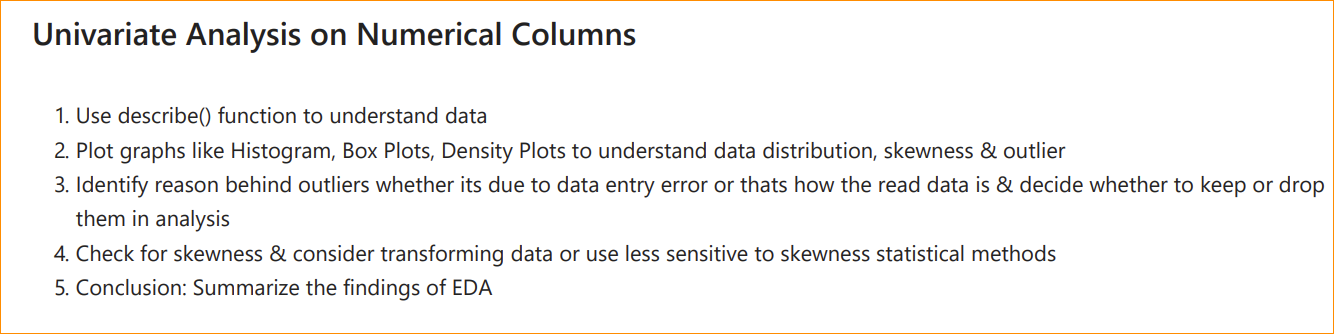

#### price

- data is left skewed means mostly laptops are below 1lakh
- all prices > 142000 are considered outliers & seems to be they are genuine

In [31]:
# find outlier based on box plot
def find_outliers(df, column_name):
    """
    Identify outliers in a DataFrame column using the IQR method.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.

    Returns:
    - pd.DataFrame: DataFrame containing the outliers.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers    

#univariate analysis of numerical col
def univariate_numerical(df, col, bins):
    # Print descriptive statistics
    print(df[col].describe())
    
    # Set up a figure with subplots for multiple plots
    plt.figure(figsize=(14, 10))
    
    # Histogram
    plt.subplot(2, 2, 1)
    df[col].plot(kind='hist', bins=bins, ax=plt.gca(), color='skyblue', edgecolor='black')
    plt.title('Histogram')
    
    # KDE plot
    plt.subplot(2, 2, 2)
    df[col].plot(kind='kde', ax=plt.gca(), color='orange')
    plt.title('KDE Plot')
    
    # Box plot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title('Box Plot')
    
    # Print skewness
    skewness = df[col].skew()
    print(f'Skewness: {skewness:.2f}')
    
    plt.tight_layout()
    plt.show()

count       824.000000
mean      75919.010922
std       55585.086866
min       12990.000000
25%       43996.750000
50%       61990.000000
75%       83192.250000
max      454290.000000
Name: price, dtype: float64
Skewness: 2.91


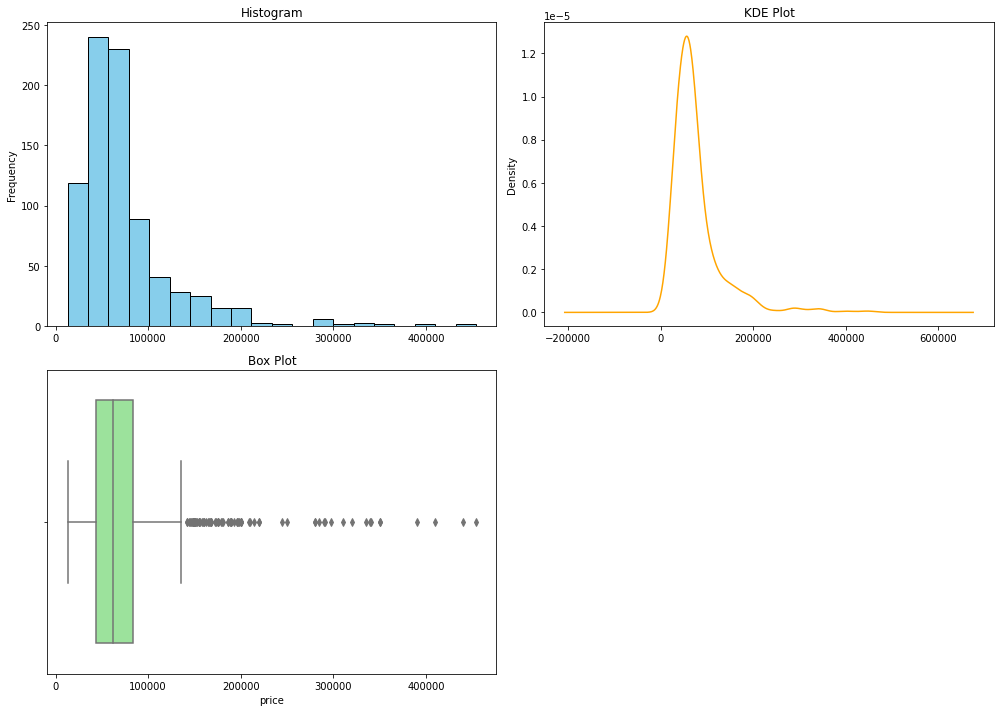

In [32]:
univariate_numerical(df, 'price', 20)

In [33]:
find_outliers(df, 'price')

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
25,189990,4.50,83,MSI,28,16.0,Windows 11,24,20,Intel,32,DDR5,1024,SSD,2560,1440,NVIDIA
139,154990,4.25,74,Acer,24,16.0,Windows 11,12,16,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
142,439990,4.70,98,MSI,20,17.3,Windows 11,24,14,Intel,64,DDR5,2048,SSD,3840,2160,Others
164,208490,4.70,89,Lenovo,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,3200,2000,NVIDIA
175,174990,4.60,84,Lenovo,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,3200,2000,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,149990,4.70,69,Lenovo,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,2560,1600,NVIDIA
784,149990,4.00,65,Asus,22,14.0,Windows 11,12,16,Intel,16,LPDDR5X,512,SSD,2880,1800,Intel
796,148690,4.45,74,Dell,32,15.6,Windows 11,12,24,Intel,16,DDR5,1024,SSD,1920,1080,NVIDIA
800,209990,4.30,64,Lenovo,12,14.0,Windows 11,12,10,Intel,16,LPDDR5,1024,SSD,1920,1200,Intel


#### rating

- no outliers
- data seems to kind of normal distribution

count    824.000000
mean       4.378155
std        0.236768
min        4.000000
25%        4.200000
50%        4.400000
75%        4.600000
max        4.750000
Name: rating, dtype: float64
Skewness: -0.03


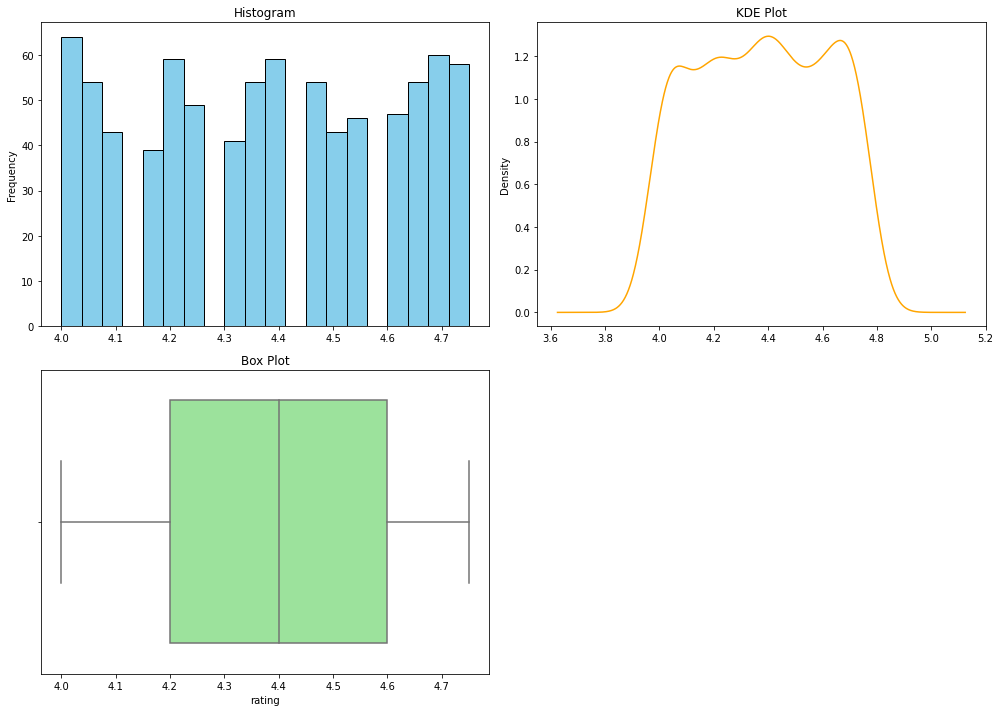

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand


In [34]:
univariate_numerical(df, 'rating', 20)
find_outliers(df, 'rating')

#### specscore

- normaly distribution
- has outliers

count    824.000000
mean      61.496359
std       10.479047
min       32.000000
25%       55.000000
50%       61.000000
75%       68.000000
max       98.000000
Name: specScore, dtype: float64
Skewness: 0.37


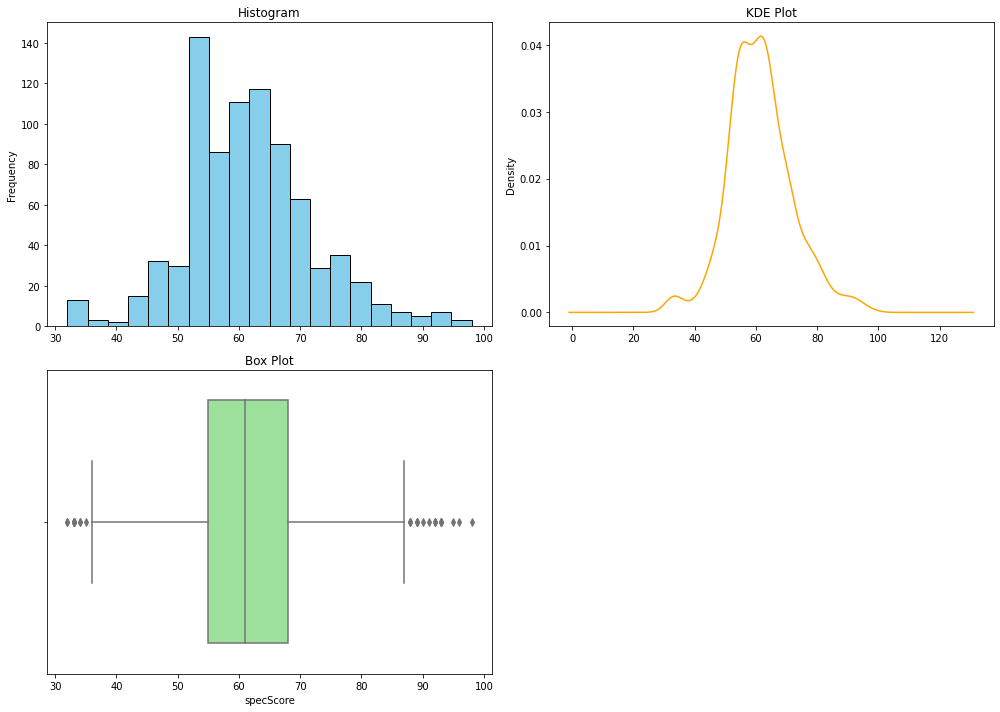

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
142,439990,4.70,98,MSI,20,17.3,Windows 11,24,14,Intel,64,DDR5,2048,SSD,3840,2160,Others
164,208490,4.70,89,Lenovo,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,3200,2000,NVIDIA
208,15990,4.75,34,Acer,2,14.0,Chrome,12,2,Intel,8,LPDDR4X,64,SSD,1080,1920,Intel
330,409990,4.70,96,MSI,32,18.0,Windows 11,24,24,Intel,64,DDR5,2048,SSD,3840,2400,NVIDIA
333,24990,4.00,33,Acer,8,14.0,Chrome,12,8,Intel,8,N/A,256,SSD,1920,1080,Intel
343,197490,4.75,88,Lenovo,28,16.0,Windows 11,12,20,Intel,32,DDR5,1024,SSD,3200,2000,NVIDIA
379,279990,4.50,92,MSI,32,17.0,Windows 11,24,24,Intel,32,DDR5,2048,SSD,2560,1600,NVIDIA
403,15990,4.75,34,Acer,2,14.0,Chrome,12,2,Intel,8,LPDDR4X,64,SSD,1080,1920,Intel
425,18990,4.30,32,Asus,2,15.6,Chrome,12,2,Intel,4,LPDDR4X,128,SSD,1920,1080,Intel
444,12990,4.35,33,Walker,2,14.1,Windows 11,12,2,Intel,4,DDR4,128,SSD,1920,1080,Intel


In [35]:
univariate_numerical(df, 'specScore', 20)
find_outliers(df, 'specScore')

#### threads

- normal distribution
- has outliers

count    824.000000
mean      13.798544
std        6.168410
min        2.000000
25%       12.000000
50%       12.000000
75%       16.000000
max       32.000000
Name: threads, dtype: float64
Skewness: 0.89


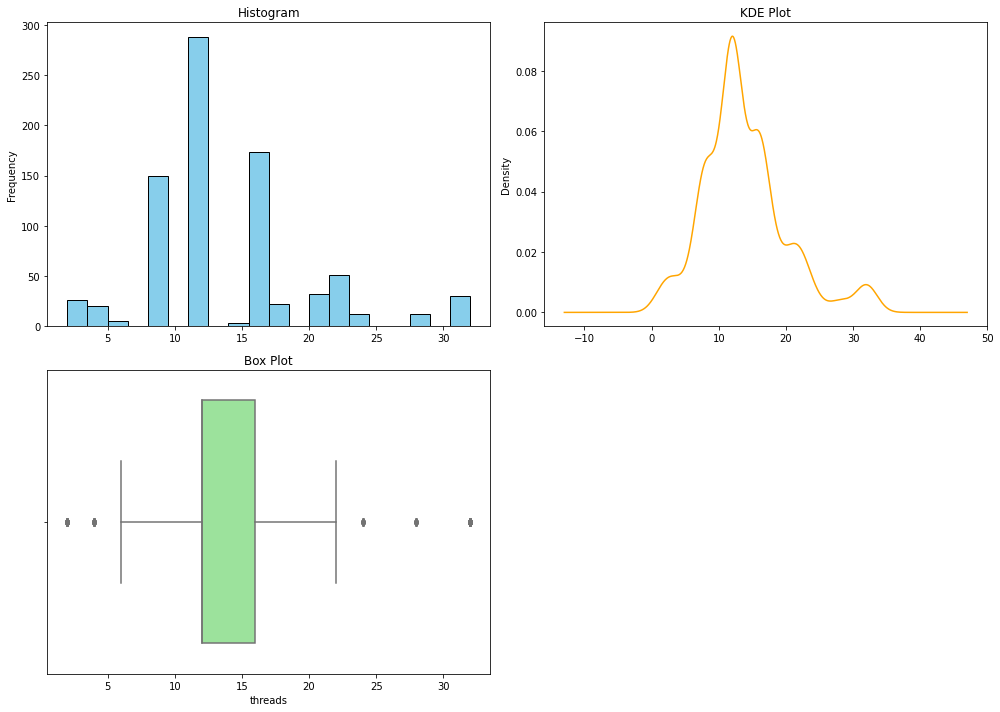

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
4,24990,4.05,54,Acer,4,14.0,Windows 11,12,2,Intel,8,DDR4,512,SSD,1920,1080,Intel
17,120999,4.30,77,Red,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
25,189990,4.50,83,MSI,28,16.0,Windows 11,24,20,Intel,32,DDR5,1024,SSD,2560,1440,NVIDIA
26,102990,4.25,78,Xiaomi,32,16.1,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
72,19990,4.25,39,Acer,2,14.0,Windows 11,12,2,Intel,8,LPDDR4X,256,SSD,1366,768,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,34390,4.30,45,Dell,4,15.6,Windows 11,12,2,Intel,8,DDR4,512,SSD,1920,1080,Intel
805,16990,4.60,36,Avita,2,14.0,Windows 11,12,2,Intel,8,DDR4,256,SSD,1920,1080,Intel
808,19990,4.40,32,Asus,2,15.6,Chrome,12,2,Intel,8,LPDDR4X,128,Hard,1920,1080,Intel
810,27990,4.60,44,Lenovo,2,15.6,Windows 11,12,2,AMD,8,LPDDR5,512,SSD,1920,1080,AMD


In [36]:
univariate_numerical(df, 'threads', 20)
find_outliers(df, 'threads')

#### screen_size

- normal distribution
- has outliers

count    824.000000
mean      15.335619
std        0.837420
min       11.600000
25%       15.600000
50%       15.600000
75%       15.600000
max       18.000000
Name: screen_size, dtype: float64
Skewness: -0.63


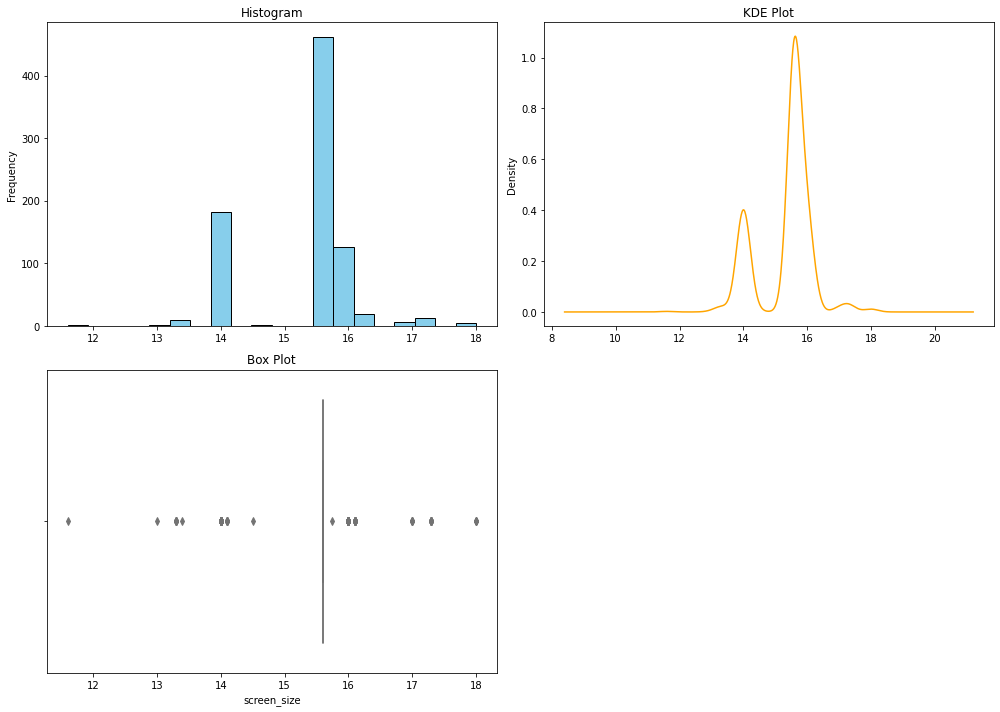

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
0,69990,4.60,69,Asus,16,16.0,Windows 11,12,12,Intel,16,DDR4,512,SSD,1920,1200,NVIDIA
1,74990,4.05,71,Asus,16,16.0,Windows 11,12,12,Intel,16,DDR4,1024,SSD,1920,1200,NVIDIA
4,24990,4.05,54,Acer,4,14.0,Windows 11,12,2,Intel,8,DDR4,512,SSD,1920,1080,Intel
15,56990,4.70,60,Acer,16,14.0,Windows 11,12,12,Intel,16,LPDDR5,512,SSD,2880,1800,Intel
17,120999,4.30,77,Red,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,16990,4.60,36,Avita,2,14.0,Windows 11,12,2,Intel,8,DDR4,256,SSD,1920,1080,Intel
811,109900,4.40,75,HP,16,16.1,Windows 11,12,8,AMD,16,DDR5,1024,SSD,1920,1080,NVIDIA
812,52990,4.75,52,Lenovo,12,14.0,D,36,10,Intel,8,DDR4,512,SSD,1920,1080,Intel
817,114999,4.00,72,HP,20,16.0,Windows 11,12,14,Intel,16,DDR4,1024,SSD,2560,1600,NVIDIA


In [37]:
univariate_numerical(df, 'screen_size', 20)
find_outliers(df, 'screen_size')

#### warranty

- data is skewed
- it has outleirs

count    824.000000
mean      13.442961
std        4.160410
min        1.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       36.000000
Name: warranty, dtype: float64
Skewness: 2.69


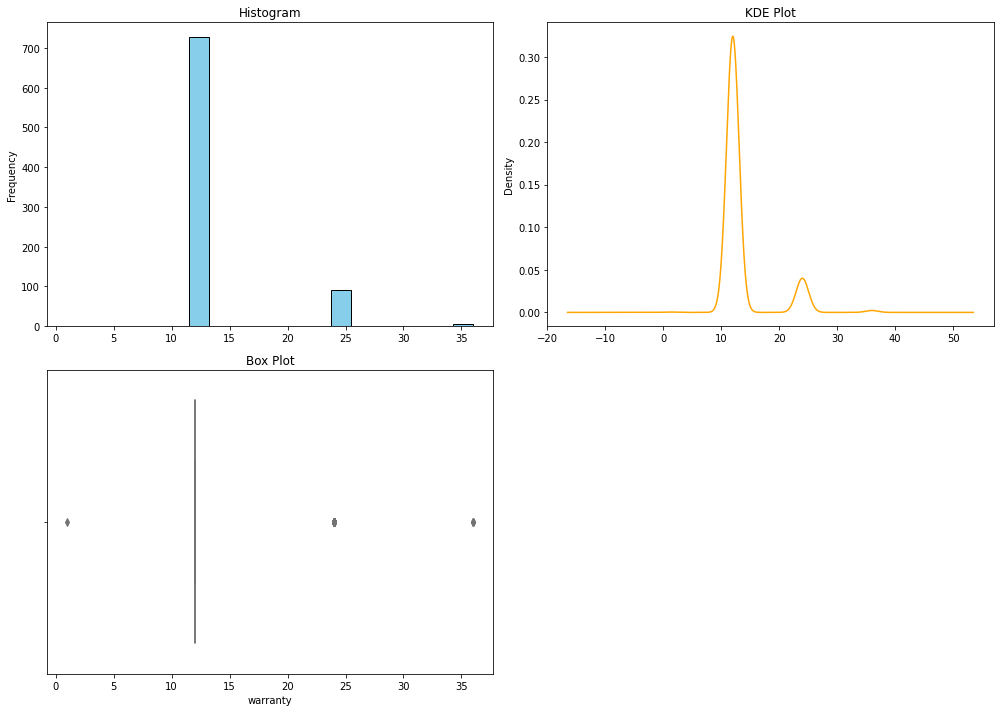

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
14,53700,4.00,68,MSI,12,15.6,Windows 11,24,8,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA
20,56990,4.00,69,MSI,12,15.6,Windows 11,24,6,AMD,16,DDR4,512,SSD,1920,1080,NVIDIA
25,189990,4.50,83,MSI,28,16.0,Windows 11,24,20,Intel,32,DDR5,1024,SSD,2560,1440,NVIDIA
66,84990,4.25,73,MSI,16,15.6,Windows 11,24,8,AMD,16,DDR4,1024,SSD,1920,1080,NVIDIA
83,62849,4.35,70,MSI,16,15.6,Windows 11,24,10,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,98990,4.20,66,MSI,18,13.3,Windows 11,24,14,Intel,16,LPDDR5,1024,SSD,2880,1800,Intel
759,112990,4.25,69,MSI,22,13.3,Windows 11,24,16,Intel,16,LPDDR5,1024,SSD,2880,1800,Intel
760,117990,4.25,70,MSI,22,16.0,Windows 11,24,16,Intel,16,LPDDR5,1024,SSD,2561,1600,Intel
779,113999,4.40,64,MSI,22,13.3,Windows 11,24,16,Intel,16,LPDDR5,512,SSD,1920,1200,Intel


In [38]:
univariate_numerical(df, 'warranty', 20)
find_outliers(df, 'warranty')

#### core_count

- normal distribution
- has outliers

count    824.000000
mean       9.435680
std        4.762984
min        2.000000
25%        6.000000
50%        8.000000
75%       12.000000
max       24.000000
Name: core_count, dtype: float64
Skewness: 1.07


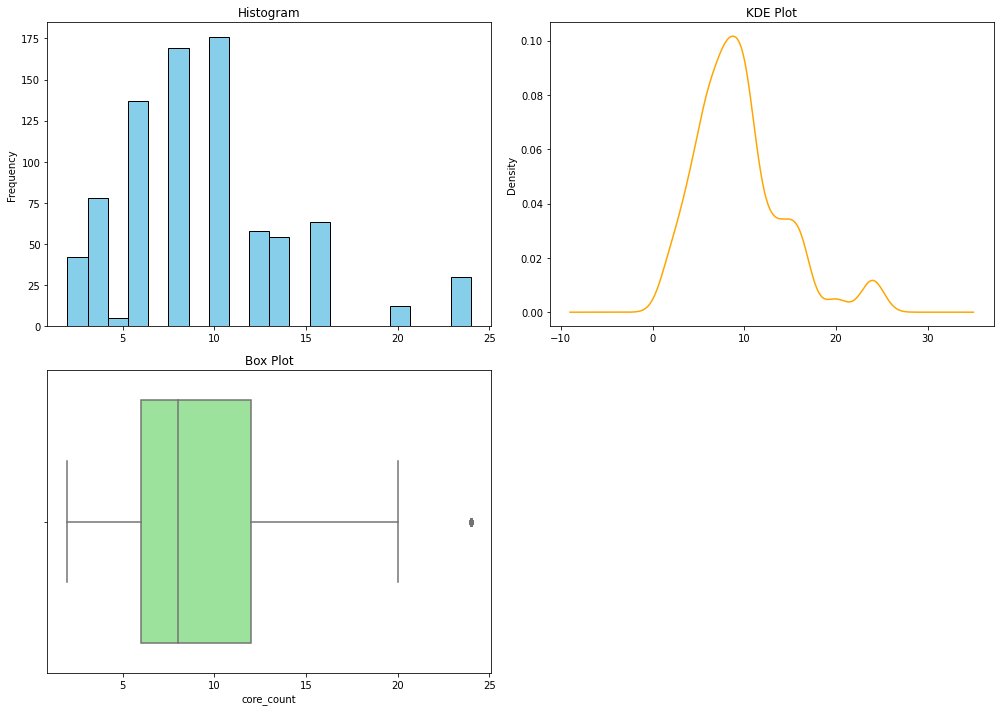

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
17,120999,4.30,77,Red,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
26,102990,4.25,78,Xiaomi,32,16.1,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
164,208490,4.70,89,Lenovo,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,3200,2000,NVIDIA
175,174990,4.60,84,Lenovo,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,3200,2000,NVIDIA
190,174990,4.05,80,Acer,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
227,249990,4.60,87,Acer,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,2560,1600,NVIDIA
228,174990,4.05,80,Acer,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
265,129990,4.45,74,Acer,32,16.0,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1600,NVIDIA
330,409990,4.70,96,MSI,32,18.0,Windows 11,24,24,Intel,64,DDR5,2048,SSD,3840,2400,NVIDIA
344,159990,4.00,77,HP,32,16.1,Windows 11,12,24,Intel,16,DDR5,1024,SSD,2560,1440,NVIDIA


In [39]:
univariate_numerical(df, 'core_count', 20)
find_outliers(df, 'core_count')

#### ram_capacity

- normal distribution
- all 32gb rams are considered outliers

count    824.000000
mean      14.558252
std        6.804973
min        4.000000
25%        8.000000
50%       16.000000
75%       16.000000
max       64.000000
Name: ram_capacity, dtype: float64
Skewness: 2.57


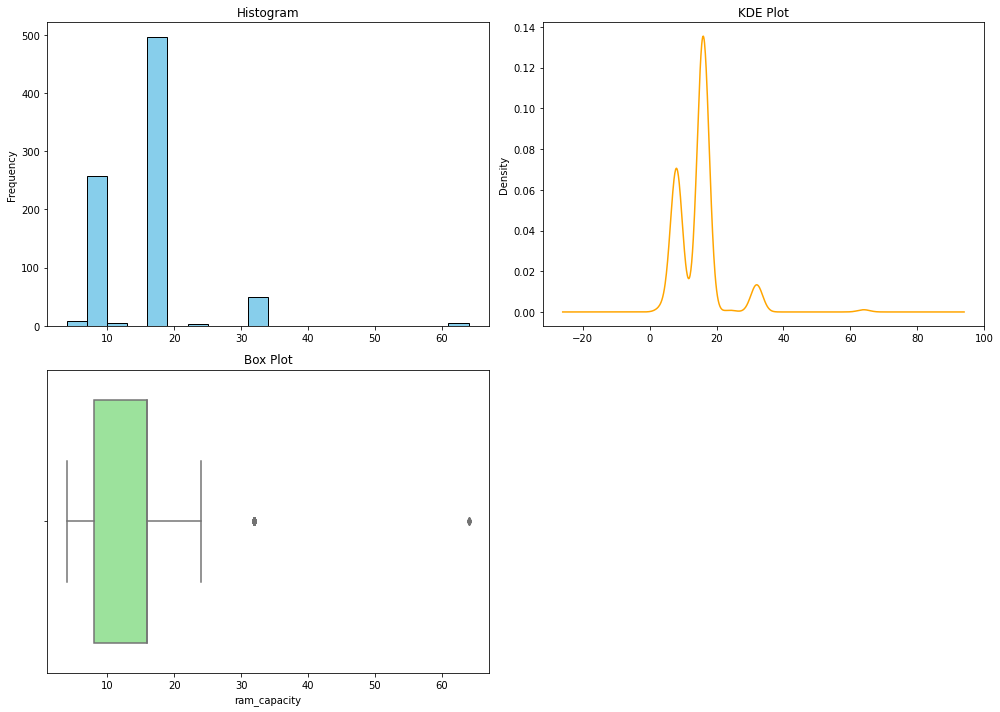

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
25,189990,4.50,83,MSI,28,16.0,Windows 11,24,20,Intel,32,DDR5,1024,SSD,2560,1440,NVIDIA
31,64990,4.05,68,Infinix,20,15.6,Windows 11,12,14,Intel,32,LPDDR5X,1024,SSD,1920,1080,Intel
73,84990,4.70,65,Infinix,22,15.6,Windows 11,12,16,Intel,32,LPDDR5X,1024,SSD,1920,1080,Intel
142,439990,4.70,98,MSI,20,17.3,Windows 11,24,14,Intel,64,DDR5,2048,SSD,3840,2160,Others
164,208490,4.70,89,Lenovo,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,3200,2000,NVIDIA
165,125990,4.65,81,HP,16,16.1,Windows 11,12,8,AMD,32,DDR5,1024,SSD,1080,1920,NVIDIA
198,135999,4.35,83,HP,16,16.0,Windows 11,12,8,AMD,32,DDR5,1024,SSD,1440,2560,NVIDIA
227,249990,4.60,87,Acer,32,16.0,Windows 11,12,24,Intel,32,DDR5,1024,SSD,2560,1600,NVIDIA
239,135999,4.35,83,HP,16,16.0,Windows 11,12,8,AMD,32,DDR5,1024,SSD,1440,2560,NVIDIA
275,172990,4.65,77,Lenovo,20,16.0,Windows 11,12,14,Intel,32,DDR5,1024,SSD,2560,1600,NVIDIA


In [40]:
univariate_numerical(df, 'ram_capacity', 20)
find_outliers(df, 'ram_capacity')

#### memory_capacity

- normal distribution
- has ourtliers

count     824.000000
mean      656.854369
std       299.587936
min        64.000000
25%       512.000000
50%       512.000000
75%      1024.000000
max      2048.000000
Name: memory_capacity, dtype: float64
Skewness: 1.83


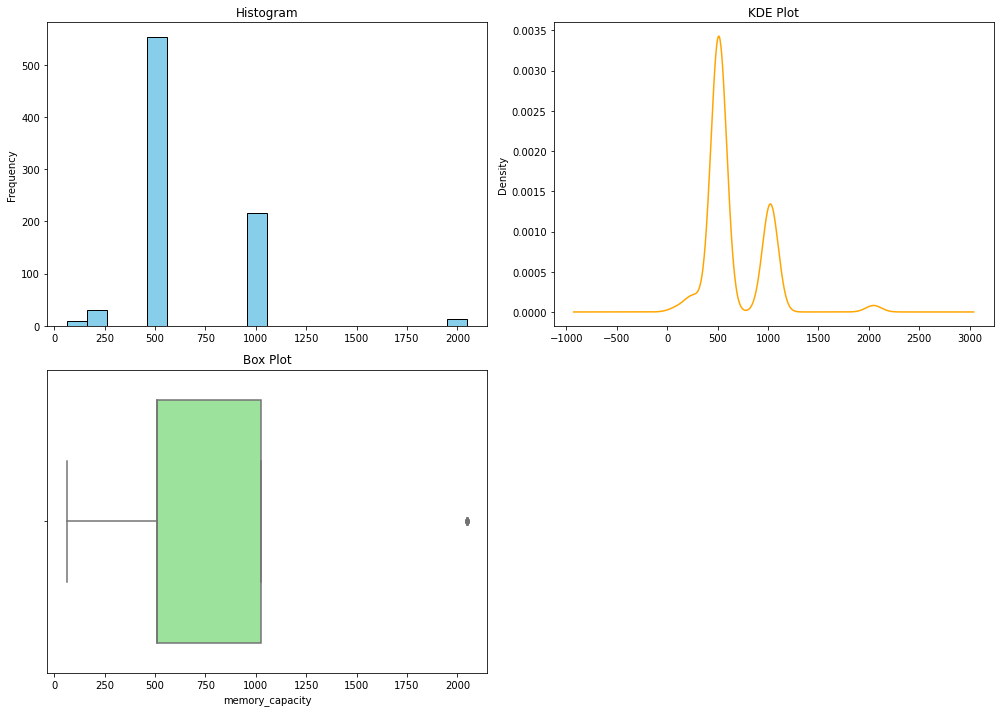

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
142,439990,4.70,98,MSI,20,17.3,Windows 11,24,14,Intel,64,DDR5,2048,SSD,3840,2160,Others
330,409990,4.70,96,MSI,32,18.0,Windows 11,24,24,Intel,64,DDR5,2048,SSD,3840,2400,NVIDIA
379,279990,4.50,92,MSI,32,17.0,Windows 11,24,24,Intel,32,DDR5,2048,SSD,2560,1600,NVIDIA
440,454290,4.35,84,Dell,20,16.0,Windows 11,12,14,Intel,32,LPDDR5,2048,SSD,3200,1800,NVIDIA
546,199990,4.05,83,Asus,20,16.0,Windows 11,12,14,Intel,32,DDR5,2048,SSD,2560,1600,NVIDIA
630,340990,4.45,93,MSI,22,18.0,Windows 11,24,16,Intel,32,DDR5,2048,SSD,3840,2400,NVIDIA
637,390990,4.45,95,MSI,22,18.0,Windows 11,24,16,Intel,32,DDR5,2048,SSD,3840,2400,NVIDIA
686,309990,4.70,93,MSI,22,16.0,Windows 11,24,16,Intel,64,DDR5,2048,SSD,3840,2400,NVIDIA
702,339990,4.30,93,MSI,32,17.0,Windows 11,24,24,Intel,32,DDR5,2048,SSD,2560,1600,NVIDIA
735,279990,4.45,93,MSI,32,17.0,Windows 11,24,24,Intel,32,DDR5,2048,SSD,2560,1600,NVIDIA


In [41]:
univariate_numerical(df, 'memory_capacity', 20)
find_outliers(df, 'memory_capacity')

#### brand 

- hp asus lenovo are most laptop sellers
- laptop < 23 change to "others"

In [42]:
#univariate categorical
def univariate_categorical(df, col):
    """
    Analyzes and visualizes a categorical column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - col (str): The name of the categorical column to analyze.

    Returns:
    - None: Displays plots and prints the number of missing values.
    """
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")
    
    # Get value counts
    counts = df[col].value_counts()
    
    # Print value counts
    print("Value Counts:\n", counts)
    
    # Plot bar chart
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Plot pie chart
    plt.subplot(1, 2, 2)
    counts.plot(kind='pie', autopct='%0.1f%%', colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Pie Chart of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print number of missing values
    missing_values = df[col].isnull().sum()
    print(f"Number of missing values in '{col}': {missing_values}")


Value Counts:
 HP           170
Lenovo       160
Asus         124
MSI          107
Acer         100
Dell          72
Infinix       23
Samsung       11
Honor          7
Gigabyte       7
Xiaomi         6
Thomson        6
Zebronics      4
Chuwi          4
Avita          4
Colorful       4
AGB            3
Ultimus        3
Realme         2
Air            2
ASUS           1
Red            1
Walker         1
Microsoft      1
Razer          1
Name: brand, dtype: int64


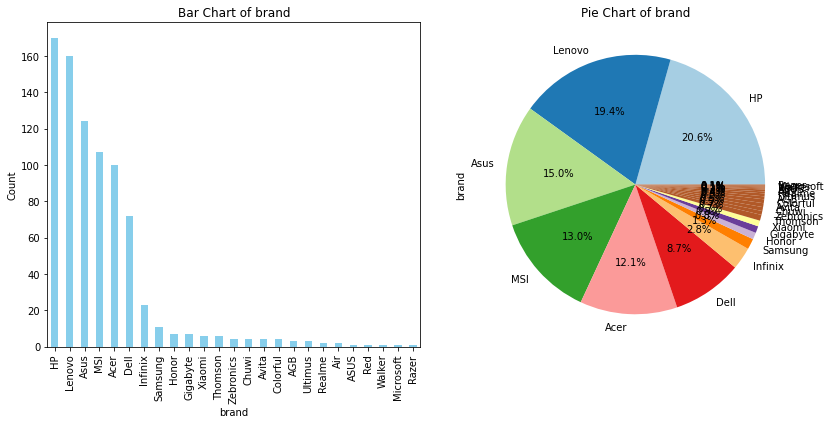

Number of missing values in 'brand': 0


In [43]:
univariate_categorical(df, 'brand')

#### os

- windows 11 is most used os
- remove space to group all similar

Value Counts:
 Windows 11      784
D                11
Chrome           10
Windows 10        8
Windows           3
Windows 11        3
Linux             2
Ubuntu            2
Windows 10        1
Name: os, dtype: int64


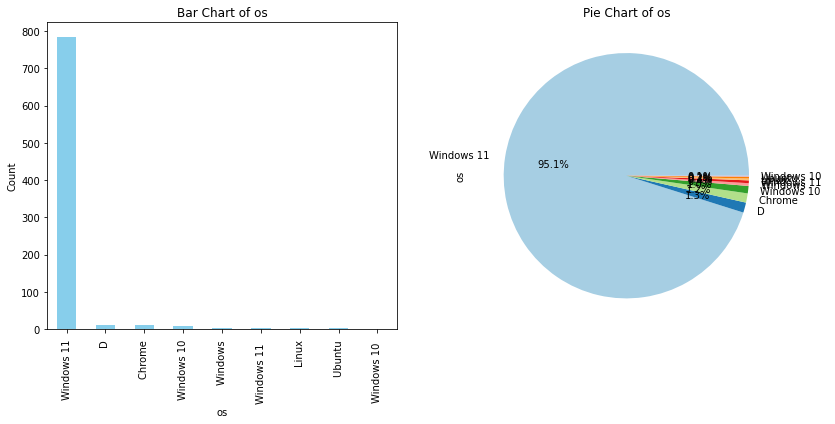

Number of missing values in 'os': 0


In [45]:
univariate_categorical(df,'os')

In [46]:
df.columns

Index(['price', 'rating', 'specScore', 'brand', 'threads', 'screen_size', 'os',
       'warranty', 'core_count', 'processor_brand', 'ram_capacity', 'ram_type',
       'memory_capacity', 'memory_type', 'width', 'height',
       'graphics_card_brand'],
      dtype='object')

#### processor_brand

- intel is market leader
- need to check where are other brands

Value Counts:
 Intel    655
AMD      169
Name: processor_brand, dtype: int64


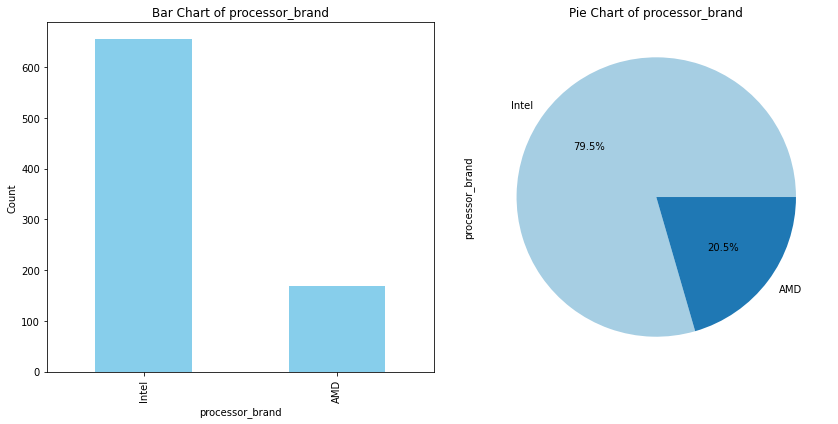

Number of missing values in 'processor_brand': 0


In [48]:
univariate_categorical(df,'processor_brand')

#### ram_type

- ddr4 is most used
- need to remove space

Value Counts:
 DDR4       404
DDR5       208
LPDDR5      83
LPDDR5X     36
LPDDR4X     28
N/A         23
LPDDR4x     16
LPDDR5x     13
LPDDR4       6
DDR6         2
LPDDRx4      2
DDR3         2
DDR4-        1
Name: ram_type, dtype: int64


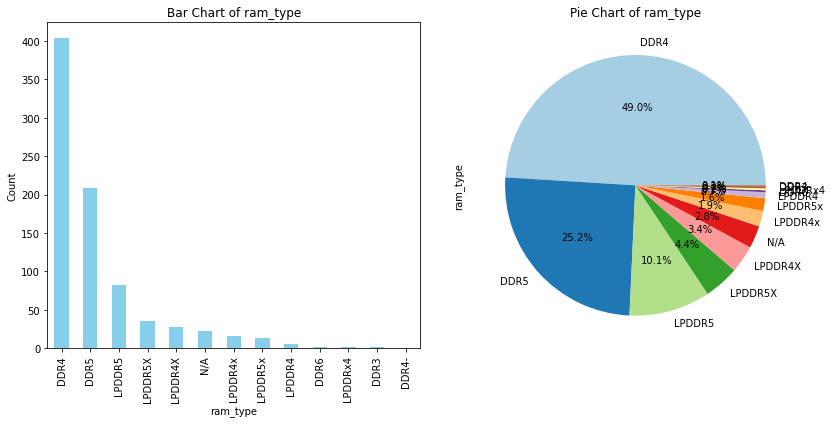

Number of missing values in 'ram_type': 0


In [49]:
univariate_categorical(df,'ram_type')

#### memory_type

- now all new laptops are ssd


Value Counts:
 SSD     818
Hard      6
Name: memory_type, dtype: int64


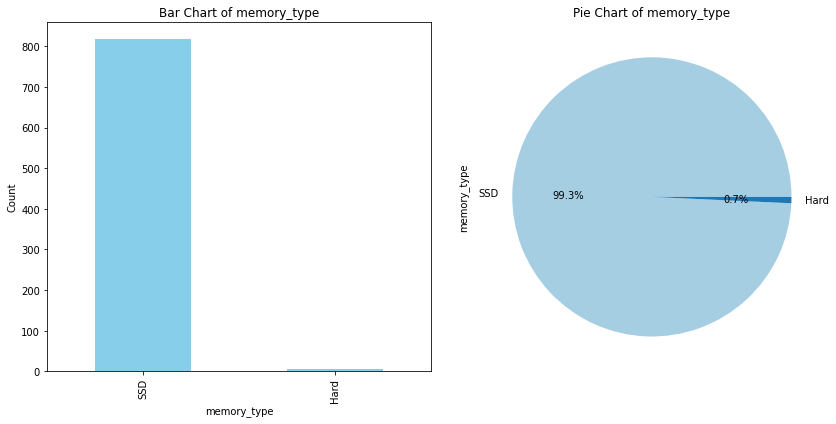

Number of missing values in 'memory_type': 0


In [51]:
univariate_categorical(df,'memory_type')

#### graphics_card_brand

- intel nvidia are major players
- check others

Value Counts:
 Intel     401
NVIDIA    320
AMD        95
Others      8
Name: graphics_card_brand, dtype: int64


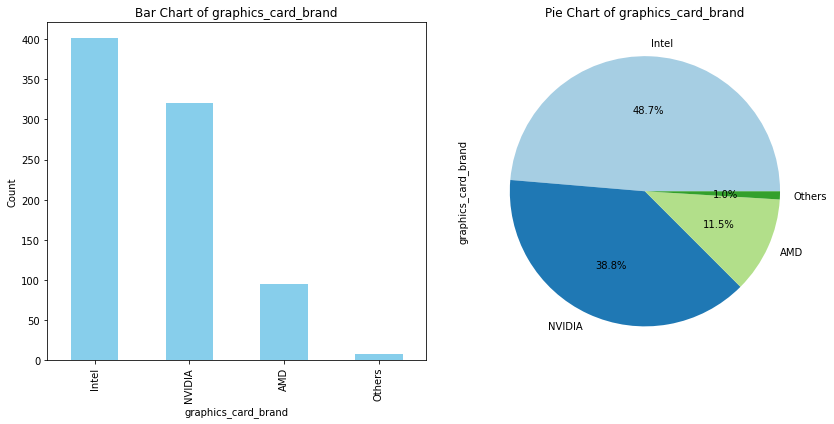

Number of missing values in 'graphics_card_brand': 0


In [54]:
univariate_categorical(df,'graphics_card_brand')

### univariate eda is complete, lets make the changes in data which we found 

- remove space
- check processor other brands
- correct os columns also

### applying strip to all dataframe

In [56]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [59]:
df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
435,62800,4.35,64,Lenovo,12,15.6,Windows 11,12,8,Intel,16,DDR5,512,SSD,1920,1080,NVIDIA
184,66990,4.75,60,HP,12,15.6,Windows 11,12,8,Intel,16,DDR4,1024,SSD,1920,1080,NVIDIA
515,59900,4.75,63,Asus,16,15.6,Windows 11,12,12,Intel,16,DDR4,512,SSD,1920,1080,Intel
236,56990,4.70,63,HP,16,15.6,Windows 11,12,8,AMD,16,DDR4,1024,SSD,1920,1080,AMD
156,72599,4.10,61,Dell,16,14.0,Windows 11,12,8,AMD,16,DDR5,1024,SSD,1920,1200,AMD


In [61]:
df['os'].value_counts()

Windows 11    787
D              11
Chrome         10
Windows 10      9
Windows         3
Linux           2
Ubuntu          2
Name: os, dtype: int64

In [63]:
df['os'] = df['os'].replace('D',"DOS")
df['os'] = df['os'].replace('Chrome',"Chrome OS")

In [64]:
df['os'].value_counts()

Windows 11    787
DOS            11
Chrome OS      10
Windows 10      9
Windows         3
Linux           2
Ubuntu          2
Name: os, dtype: int64

In [66]:
df['os'] = df['os'].replace('Windows',"Windows 11")

In [67]:
df['os'].value_counts()

Windows 11    790
DOS            11
Chrome OS      10
Windows 10      9
Linux           2
Ubuntu          2
Name: os, dtype: int64

In [72]:
df['graphics_card_brand'].value_counts()

Intel     401
NVIDIA    320
AMD        95
Others      8
Name: graphics_card_brand, dtype: int64

In [110]:
df['brand'].value_counts()

HP           170
Lenovo       160
Asus         124
MSI          107
Acer         100
Dell          72
Infinix       23
Samsung       11
Honor          7
Gigabyte       7
Xiaomi         6
Thomson        6
Zebronics      4
Chuwi          4
Avita          4
Colorful       4
AGB            3
Ultimus        3
Realme         2
Air            2
ASUS           1
Red            1
Walker         1
Microsoft      1
Razer          1
Name: brand, dtype: int64

In [111]:
# Compute the value counts
brand_counts = df['brand'].value_counts()

# Identify brands to be tagged as 'Others'
brands_to_replace = brand_counts[brand_counts <= 23].index

# Replace identified brands with 'Others'
df['brand'] = df['brand'].replace(brands_to_replace, 'Others')

In [113]:
df['brand'].value_counts()

HP        170
Lenovo    160
Asus      124
MSI       107
Acer      100
Others     91
Dell       72
Name: brand, dtype: int64

In [114]:
df.to_excel("smartprix_laptop_cleaned_v6.xlsx", index=False)

In [115]:
data_df = df.copy()

## Bi-variate analysis on data_df


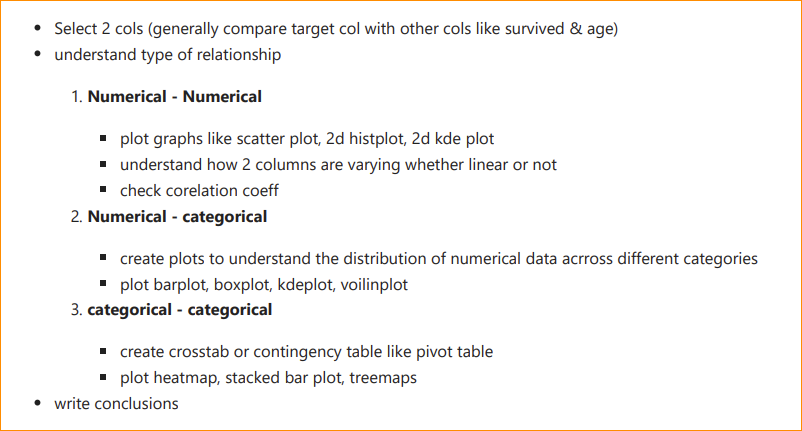

In [116]:
data_df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
759,112990,4.25,69,MSI,22,13.3,Windows 11,24,16,Intel,16,LPDDR5,1024,SSD,2880,1800,Intel
475,104990,4.00,69,Acer,24,16.0,Windows 11,12,16,Intel,16,DDR5,512,SSD,1920,1200,NVIDIA
602,91051,4.60,70,Others,16,15.6,Windows 11,24,12,Intel,16,DDR5,512,SSD,1920,1080,NVIDIA
300,68990,4.75,57,Lenovo,12,14.0,Windows 11,12,10,Intel,16,DDR4,512,SSD,1920,1200,Intel
479,58990,4.65,70,HP,12,16.1,Windows 11,12,6,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA


#### price & rating

- are not liearly related means rating doesnt effect price much

In [117]:
def interpret_correlation(correlation):
    if correlation > 0.7:
        strength = "strong"
        direction = "positive"
    elif correlation > 0.3:
        strength = "moderate"
        direction = "positive"
    elif correlation > 0:
        strength = "weak"
        direction = "positive"
    elif correlation < -0.7:
        strength = "strong"
        direction = "negative"
    elif correlation < -0.3:
        strength = "moderate"
        direction = "negative"
    elif correlation < 0:
        strength = "weak"
        direction = "negative"
    else:
        strength = "no"
        direction = "no"
    
    return f"The correlation coefficient is {correlation:.2f}, indicating a {strength} {direction} linear relationship."

def bi_variate_for_2_cols(df, col1, col2):
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"Columns {col1} and/or {col2} do not exist in the DataFrame.")
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.title(f'Scatter Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    plt.subplot(2, 2, 2)
    plt.hist2d(df[col1], df[col2], bins=20, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title(f'2D Histogram of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    plt.subplot(2, 2, 3)
    sns.kdeplot(x=col1, y=col2, data=df, cmap='Blues', fill=True)
    plt.title(f'2D KDE Plot of {col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    correlation = df[col1].corr(df[col2])
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.text(0.5, 0.5, interpret_correlation(correlation),
             fontsize=12, ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return correlation

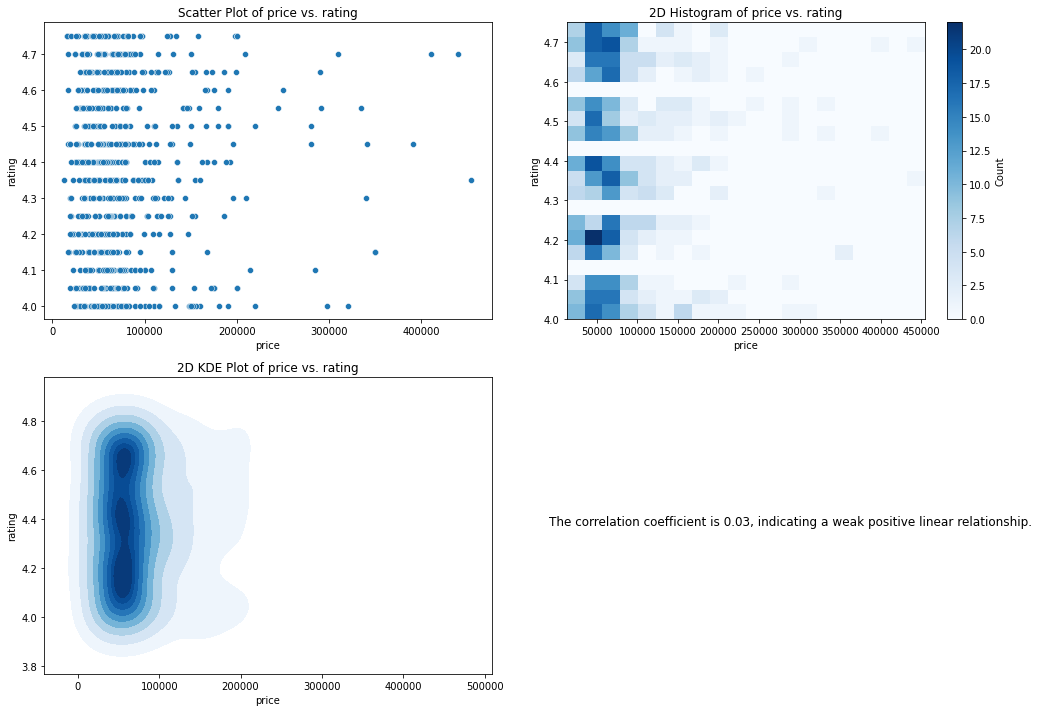

Correlation coefficient between price and rating: 0.03


In [118]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'rating')
print(f'Correlation coefficient between price and rating: {correlation:.2f}')

#### price & specScore

- they are linearly related

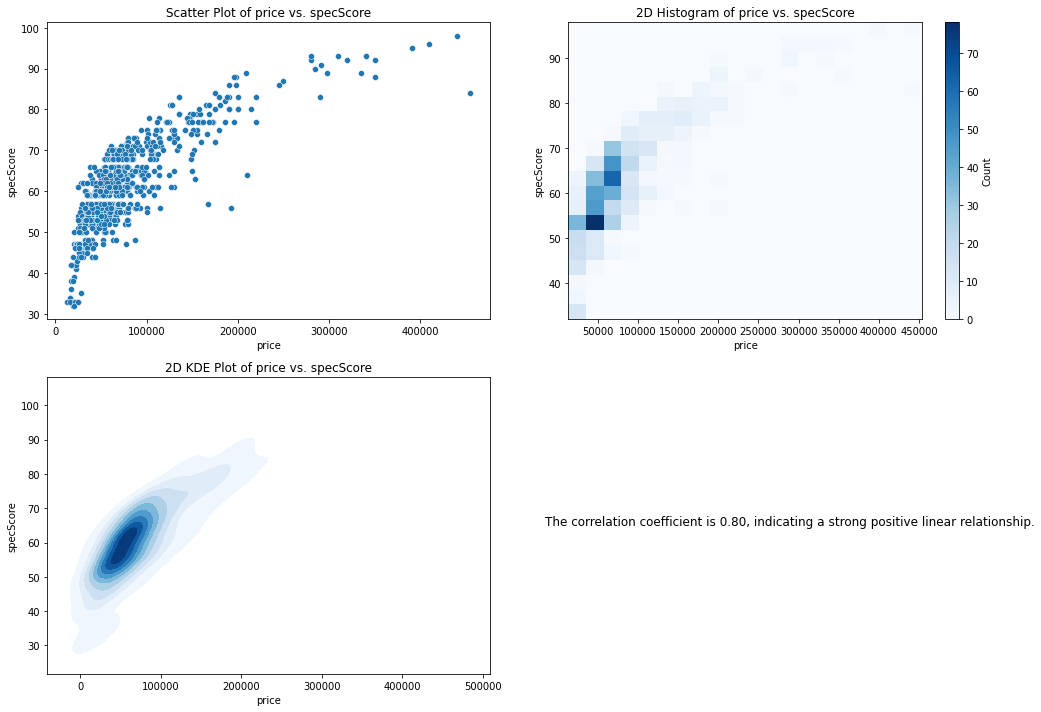

Correlation coefficient between price and specScore: 0.80


In [119]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'specScore')
print(f'Correlation coefficient between price and specScore: {correlation:.2f}')

#### price & threads

- they are linearly related to each other

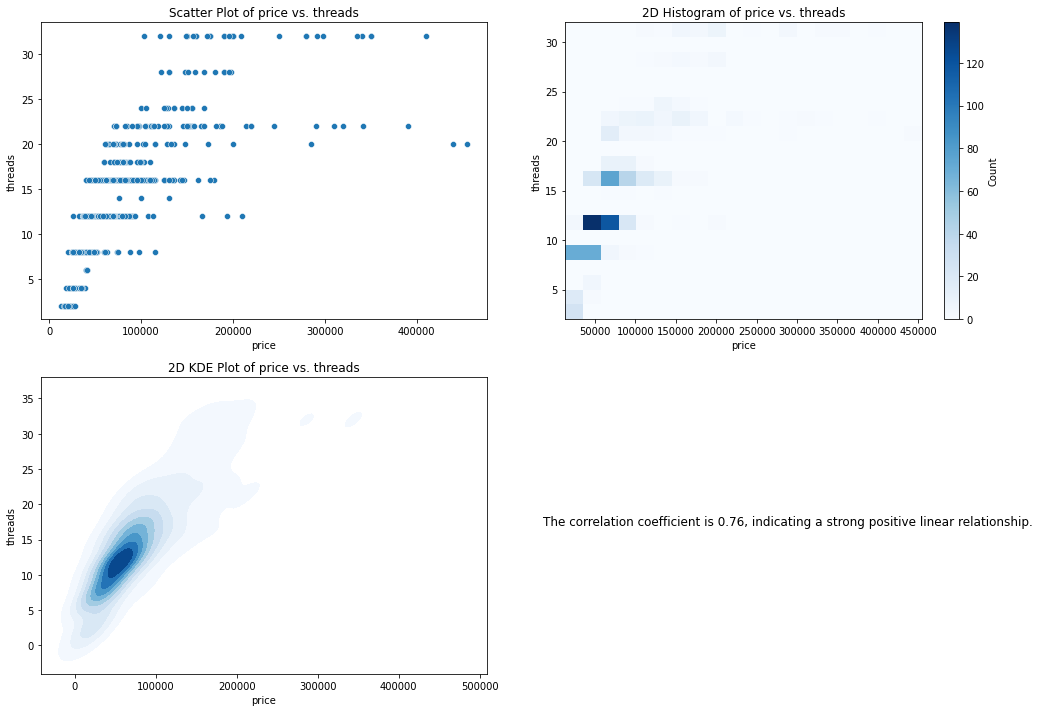

Correlation coefficient between price and threads: 0.76


In [120]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'threads')
print(f'Correlation coefficient between price and threads: {correlation:.2f}')

#### price & screen_size

- doesnt have any pattern not much linearly related

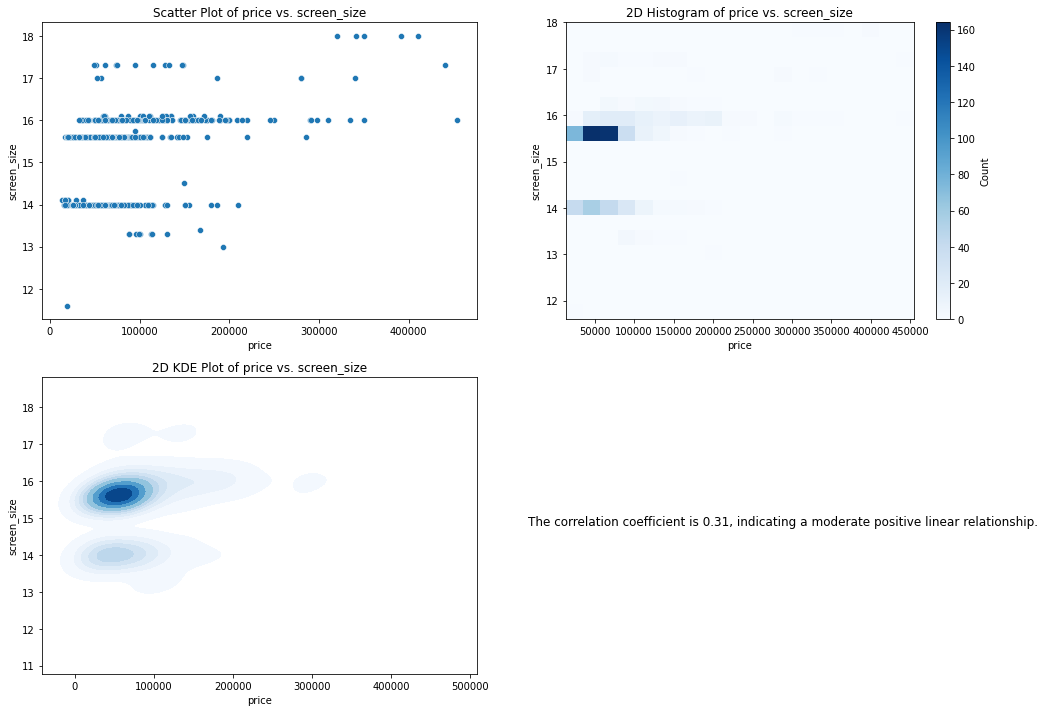

Correlation coefficient between price and screen_size: 0.31


In [121]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'screen_size')
print(f'Correlation coefficient between price and screen_size: {correlation:.2f}')

#### price & warranty

- warranty also doesnt have much effect on price

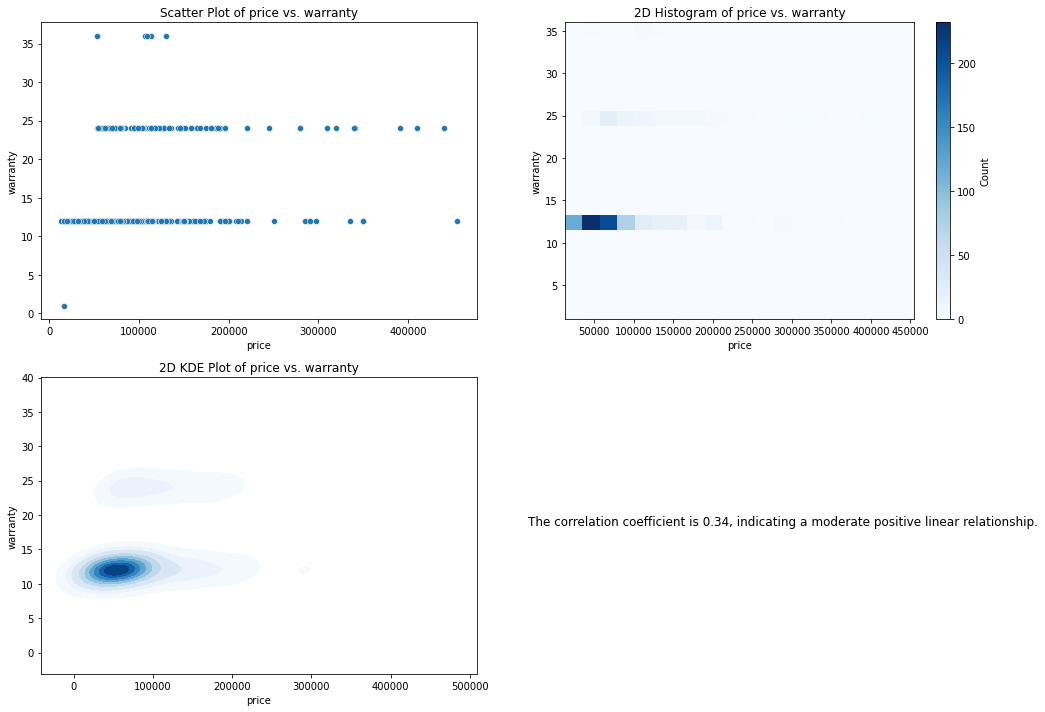

Correlation coefficient between price and warranty: 0.34


In [122]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'warranty')
print(f'Correlation coefficient between price and warranty: {correlation:.2f}')

#### price & core_count

- price increases as no of core count increases

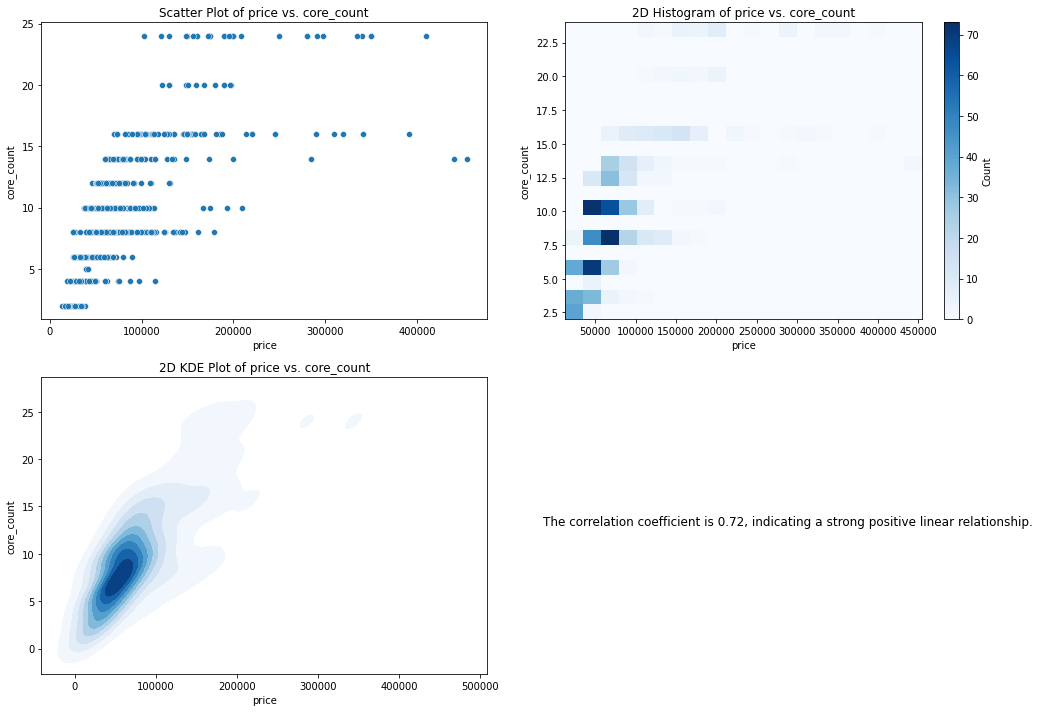

Correlation coefficient between price and core_count: 0.72


In [123]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'core_count')
print(f'Correlation coefficient between price and core_count: {correlation:.2f}')

#### price & ram_capacity

- ram increases so does the price

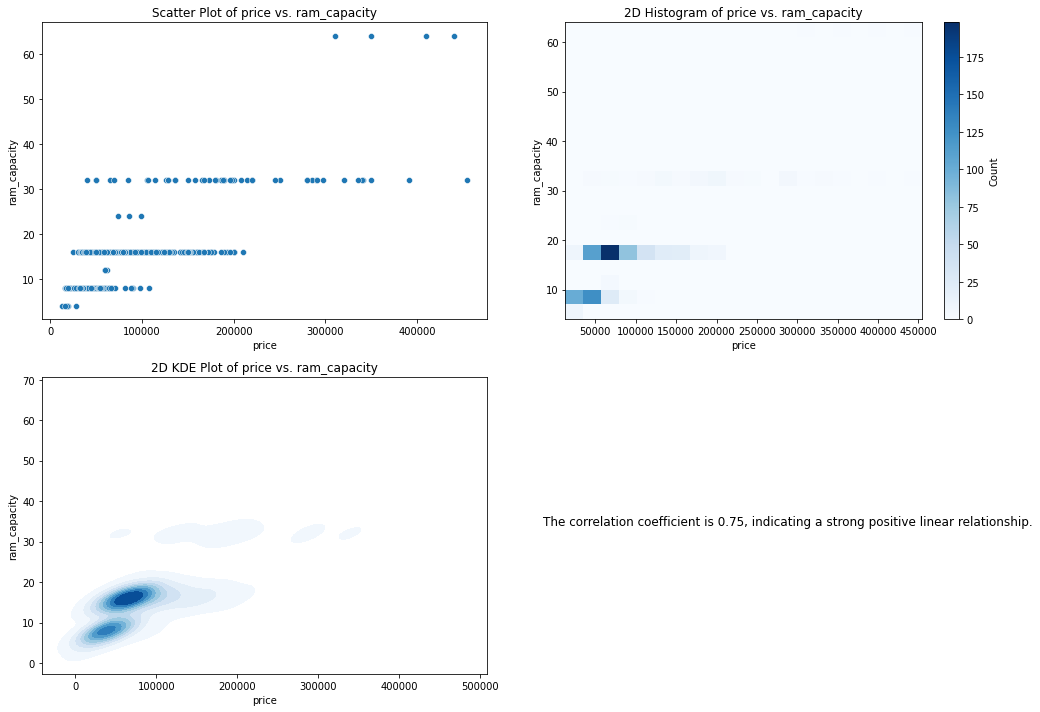

Correlation coefficient between price and ram_capacity: 0.75


In [124]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'ram_capacity')
print(f'Correlation coefficient between price and ram_capacity: {correlation:.2f}')

#### price & memory_capacity

- price increases when memory increases

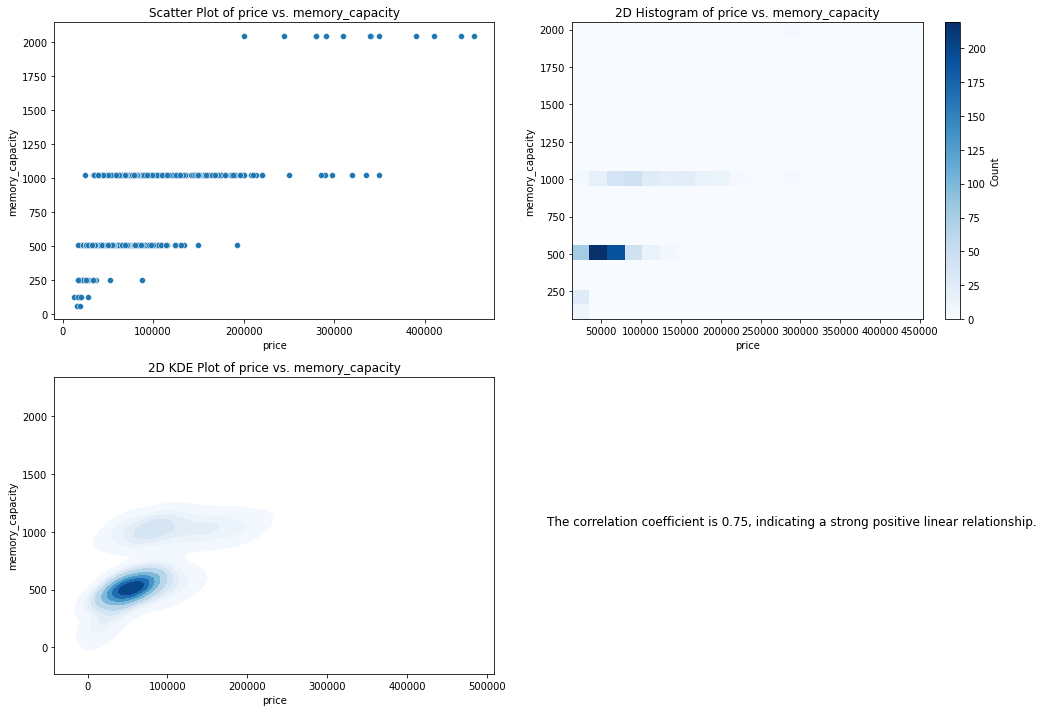

Correlation coefficient between price and memory_capacity: 0.75


In [125]:
correlation = bi_variate_for_2_cols(data_df, 'price', 'memory_capacity')
print(f'Correlation coefficient between price and memory_capacity: {correlation:.2f}')

In [126]:
df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
725,59990,4.55,55,Asus,12,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,1920,1080,Intel
336,54697,4.30,59,Dell,12,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,1920,1080,Intel
364,79990,4.75,52,Lenovo,18,16.0,Windows 11,12,14,Intel,16,LPDDR5X,1024,SSD,1920,1200,Intel
204,49990,4.00,57,Others,16,14.0,Windows 11,12,12,Intel,16,LPDDR5,512,SSD,2880,1800,Intel
324,45490,4.20,53,Lenovo,12,14.0,Windows 11,12,8,Intel,8,LPDDR5,512,SSD,1920,1080,Intel


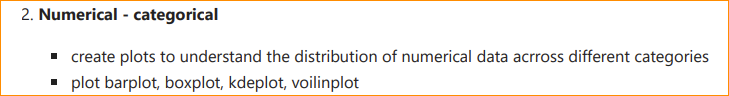

In [127]:
data_df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
594,20990,4.20,33,Acer,2,15.6,Windows 11,12,2,Intel,8,LPDDR4X,256,SSD,1366,768,Intel
54,64990,4.70,64,Acer,12,15.6,Windows 11,12,8,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA
587,45799,4.25,56,HP,8,15.6,Windows 11,12,4,AMD,8,LPDDR5,512,SSD,1920,1080,AMD
116,67990,4.40,66,Asus,12,15.6,Windows 11,12,6,AMD,16,DDR5,512,SSD,1920,1080,NVIDIA
447,80990,4.75,64,HP,16,14.0,Windows 11,12,12,Intel,16,DDR4,512,SSD,2240,1400,Intel


#### price & brand

- msi laptop are more expensive
- rest are in the same range

In [128]:
def bivariet_categorical(df, cat_col, num_col):
    """
    Creates various plots to understand the distribution of numerical data across different categories.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - cat_col: string, name of the categorical column
    - num_col: string, name of the numerical column
    """
    # Check if the specified columns exist in the DataFrame
    if cat_col not in df.columns or num_col not in df.columns:
        raise ValueError(f"Columns {cat_col} and/or {num_col} do not exist in the DataFrame.")
    
    # Initialize the figure
    plt.figure(figsize=(18, 14))
    
    # Bar Plot
    plt.subplot(2, 2, 1)
    sns.barplot(x=cat_col, y=num_col, data=df, estimator=np.mean)
    plt.title(f'Bar Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    # Box Plot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    # KDE Plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(data=df, x=num_col, hue=cat_col, common_norm=False, fill=True)
    plt.title(f'KDE Plot of {num_col} by {cat_col}')
    plt.xlabel(num_col)
    plt.ylabel('Density')
    
    # Violin Plot
    plt.subplot(2, 2, 4)
    sns.violinplot(x=cat_col, y=num_col, data=df, inner="quartile")
    plt.title(f'Violin Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

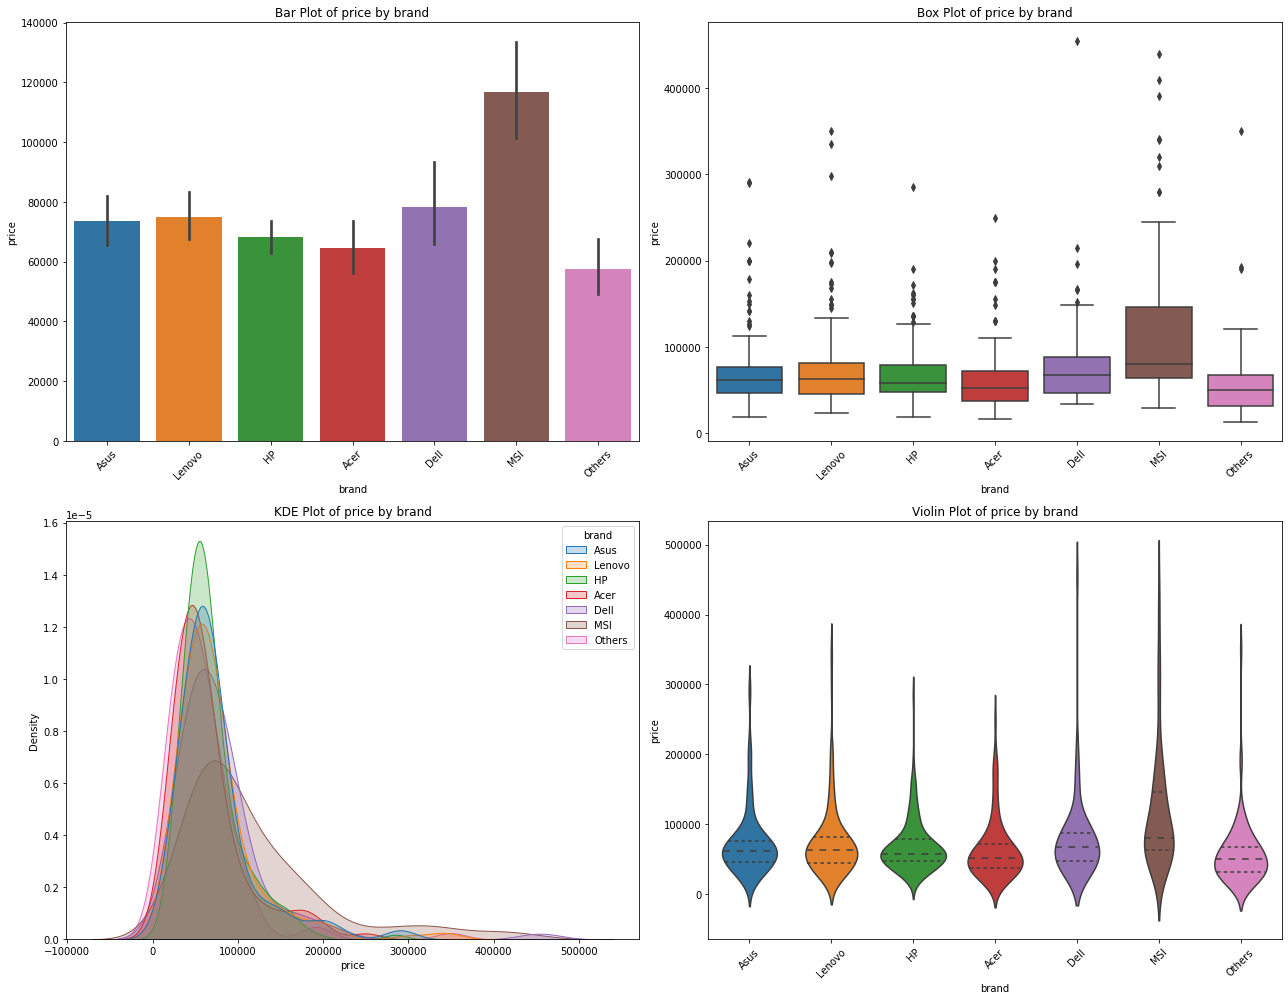

In [129]:
bivariet_categorical(df, 'brand', 'price')

#### price & os

- windows 11 are more expensive

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


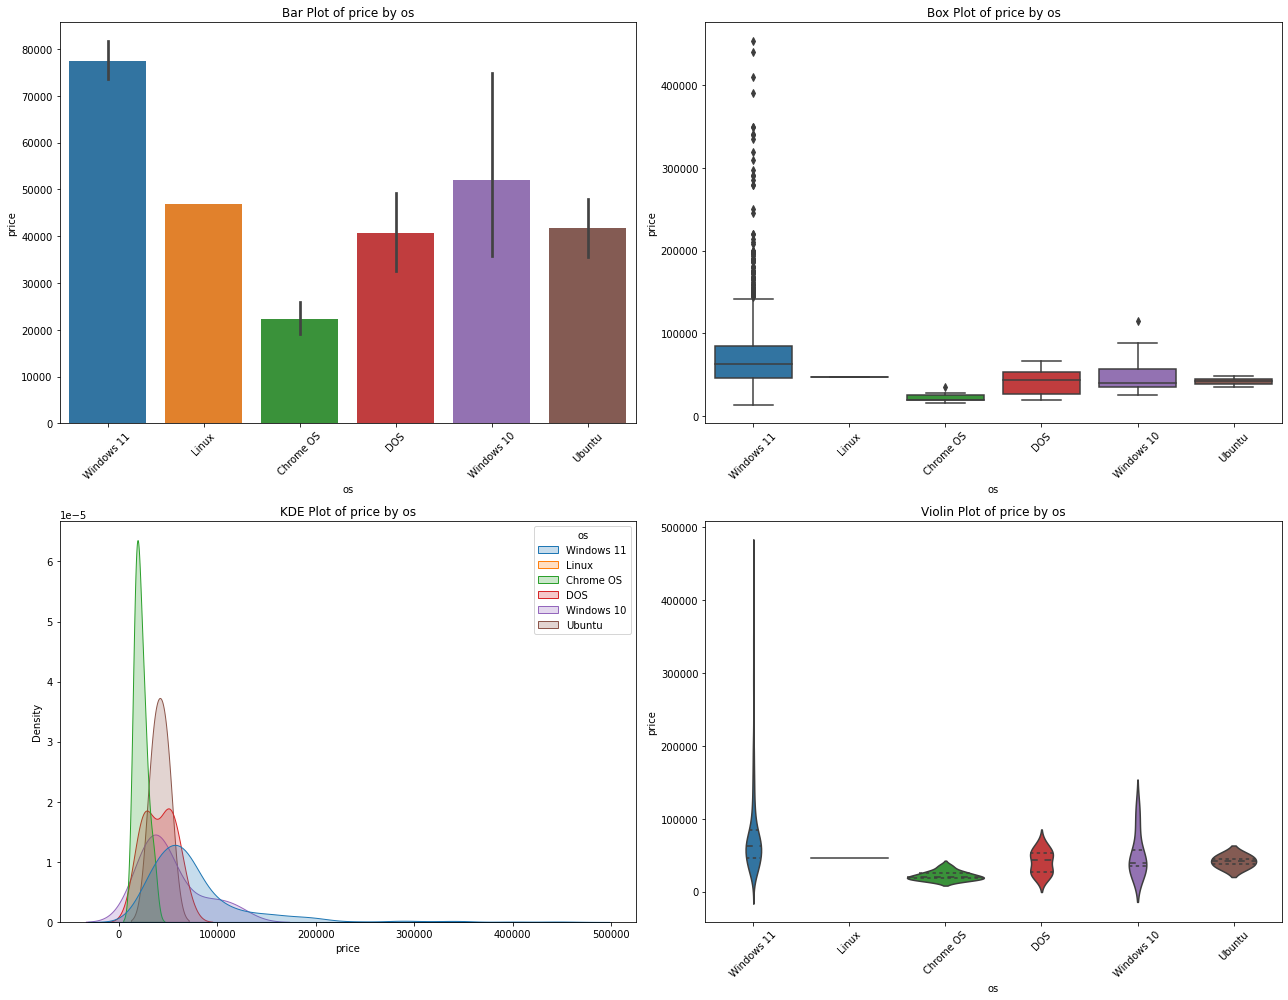

In [130]:
bivariet_categorical(df, 'os', 'price')

#### price & processor_brand

- intel processor are more expensive

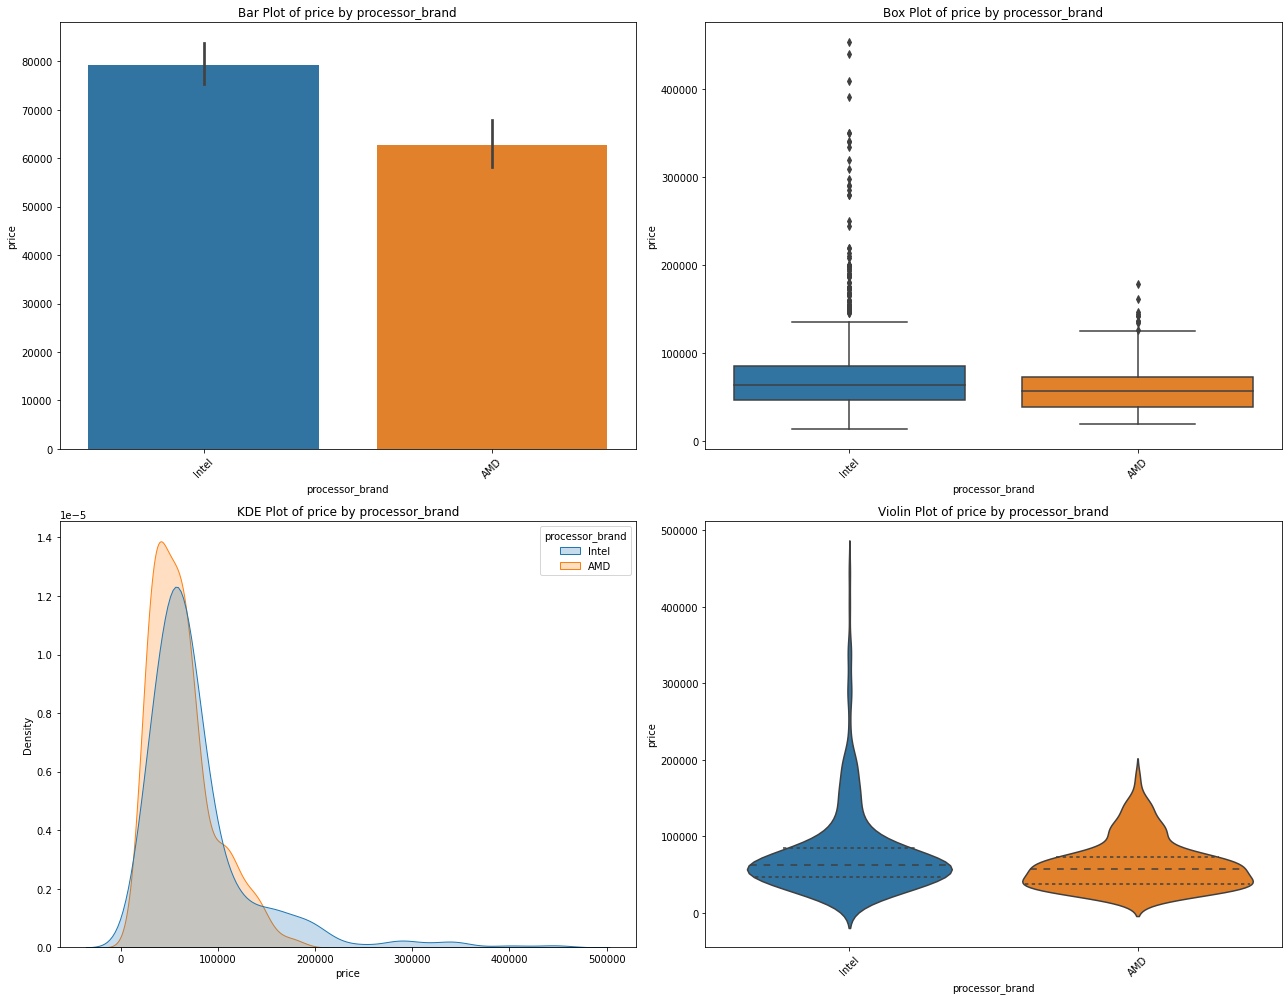

In [132]:
bivariet_categorical(df, 'processor_brand', 'price')

#### price & ram_type

- ddr5 laptop are more expensive

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


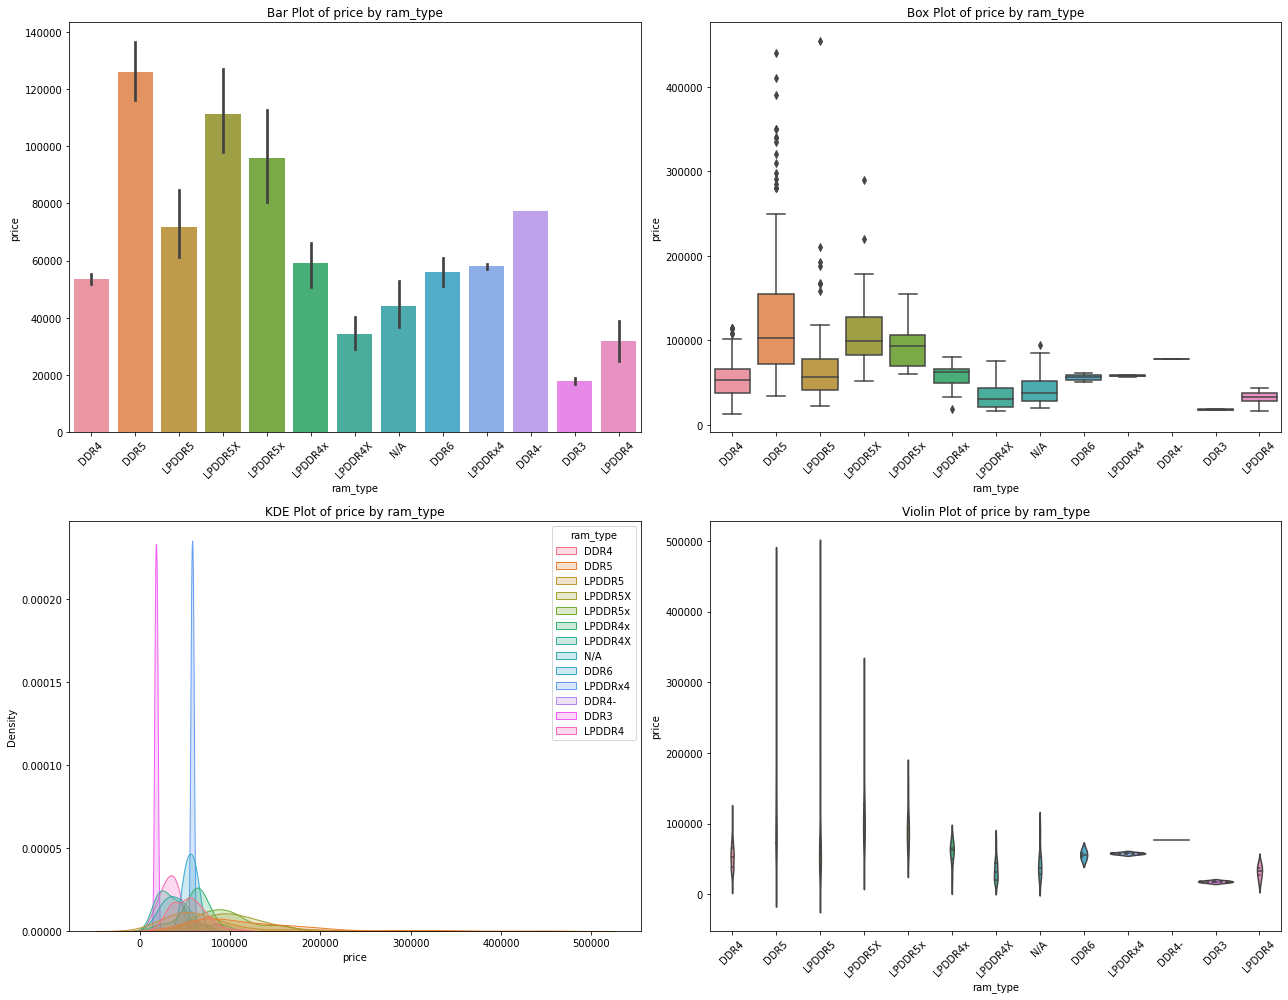

In [136]:
bivariet_categorical(df, 'ram_type', 'price')

#### price & memory type

- ssd laptop are more expensive

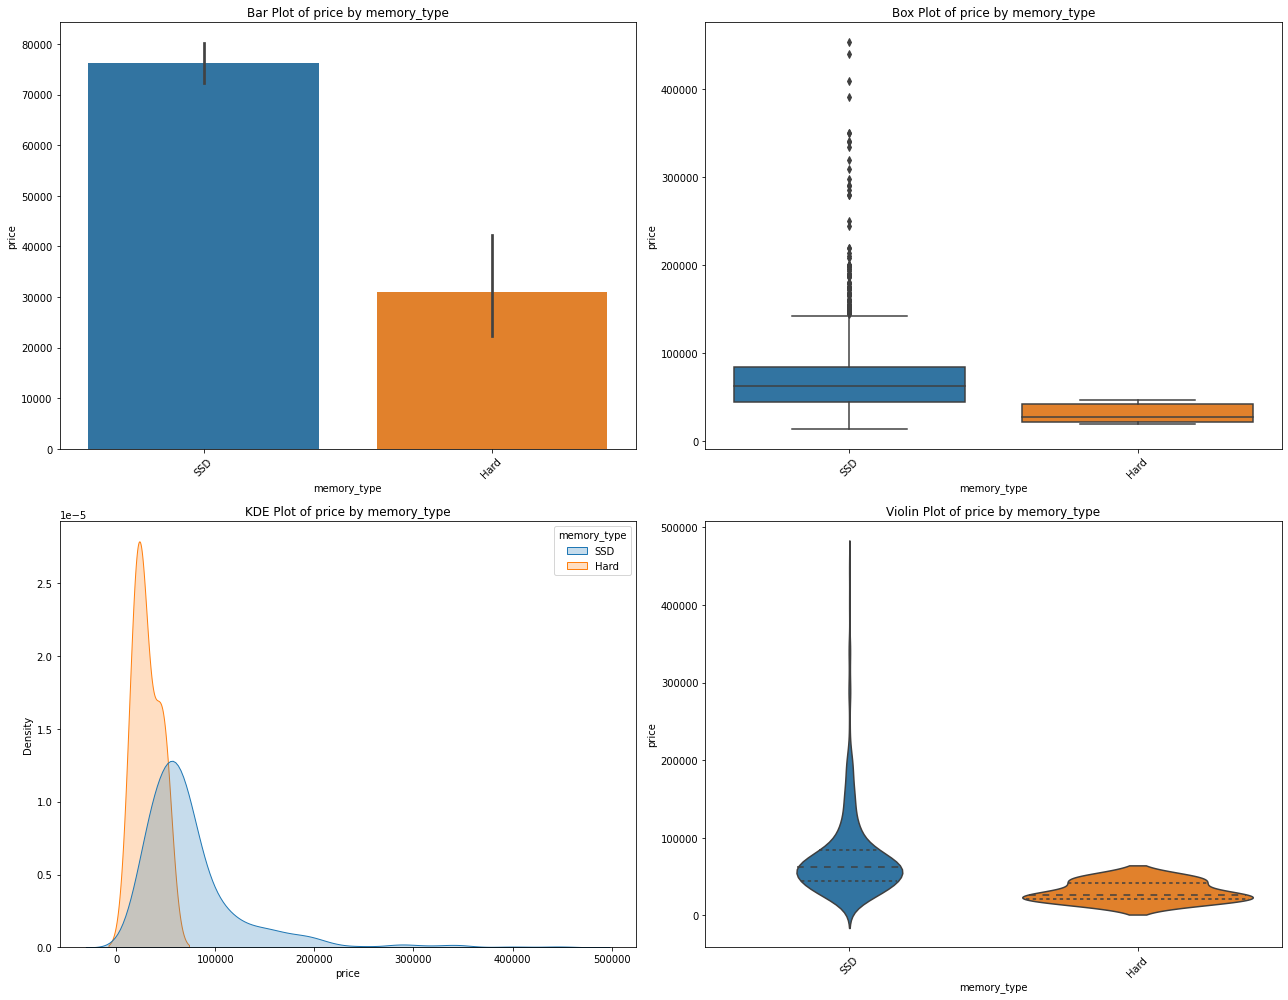

In [138]:
bivariet_categorical(df, 'memory_type', 'price')

#### price & graphics_card_brand

- nvidia are more expensive

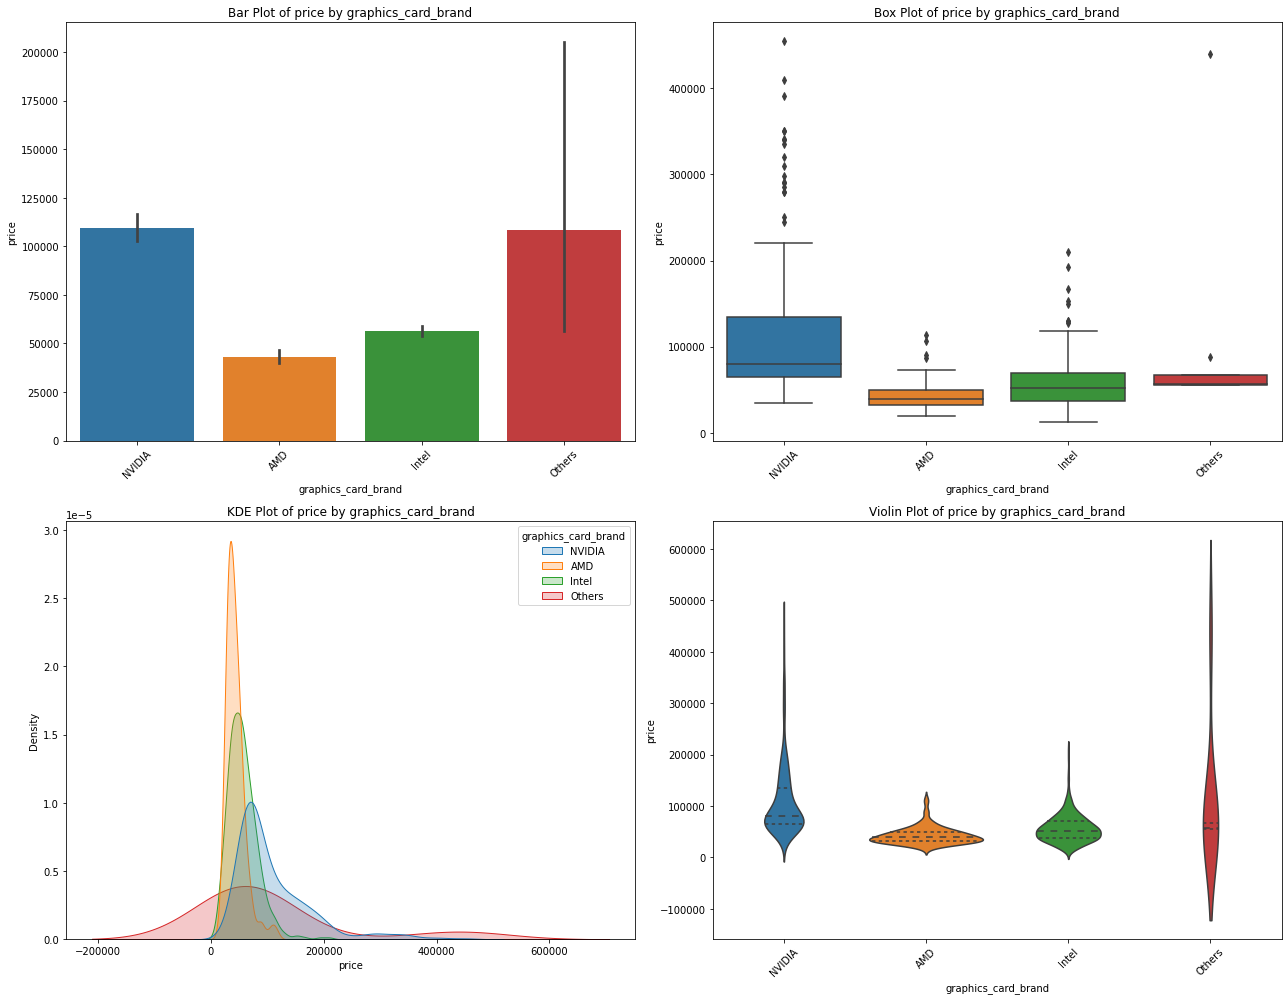

In [140]:
bivariet_categorical(df, 'graphics_card_brand', 'price')

## Multivariate Analysis

- price has corelation with specscore, threads, ram & memory

In [141]:
data_df.corr()['price']

price              1.000000
rating             0.025939
specScore          0.797449
threads            0.755459
screen_size        0.309479
warranty           0.340647
core_count         0.724046
ram_capacity       0.750969
memory_capacity    0.745521
width              0.656251
height             0.656988
Name: price, dtype: float64

<AxesSubplot:>

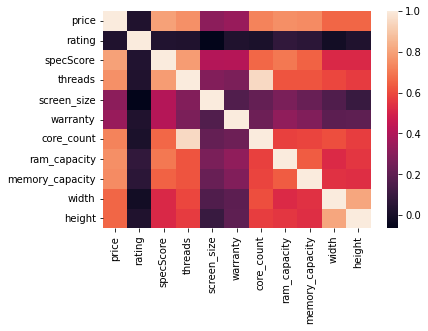

In [143]:
sns.heatmap(data_df.corr())

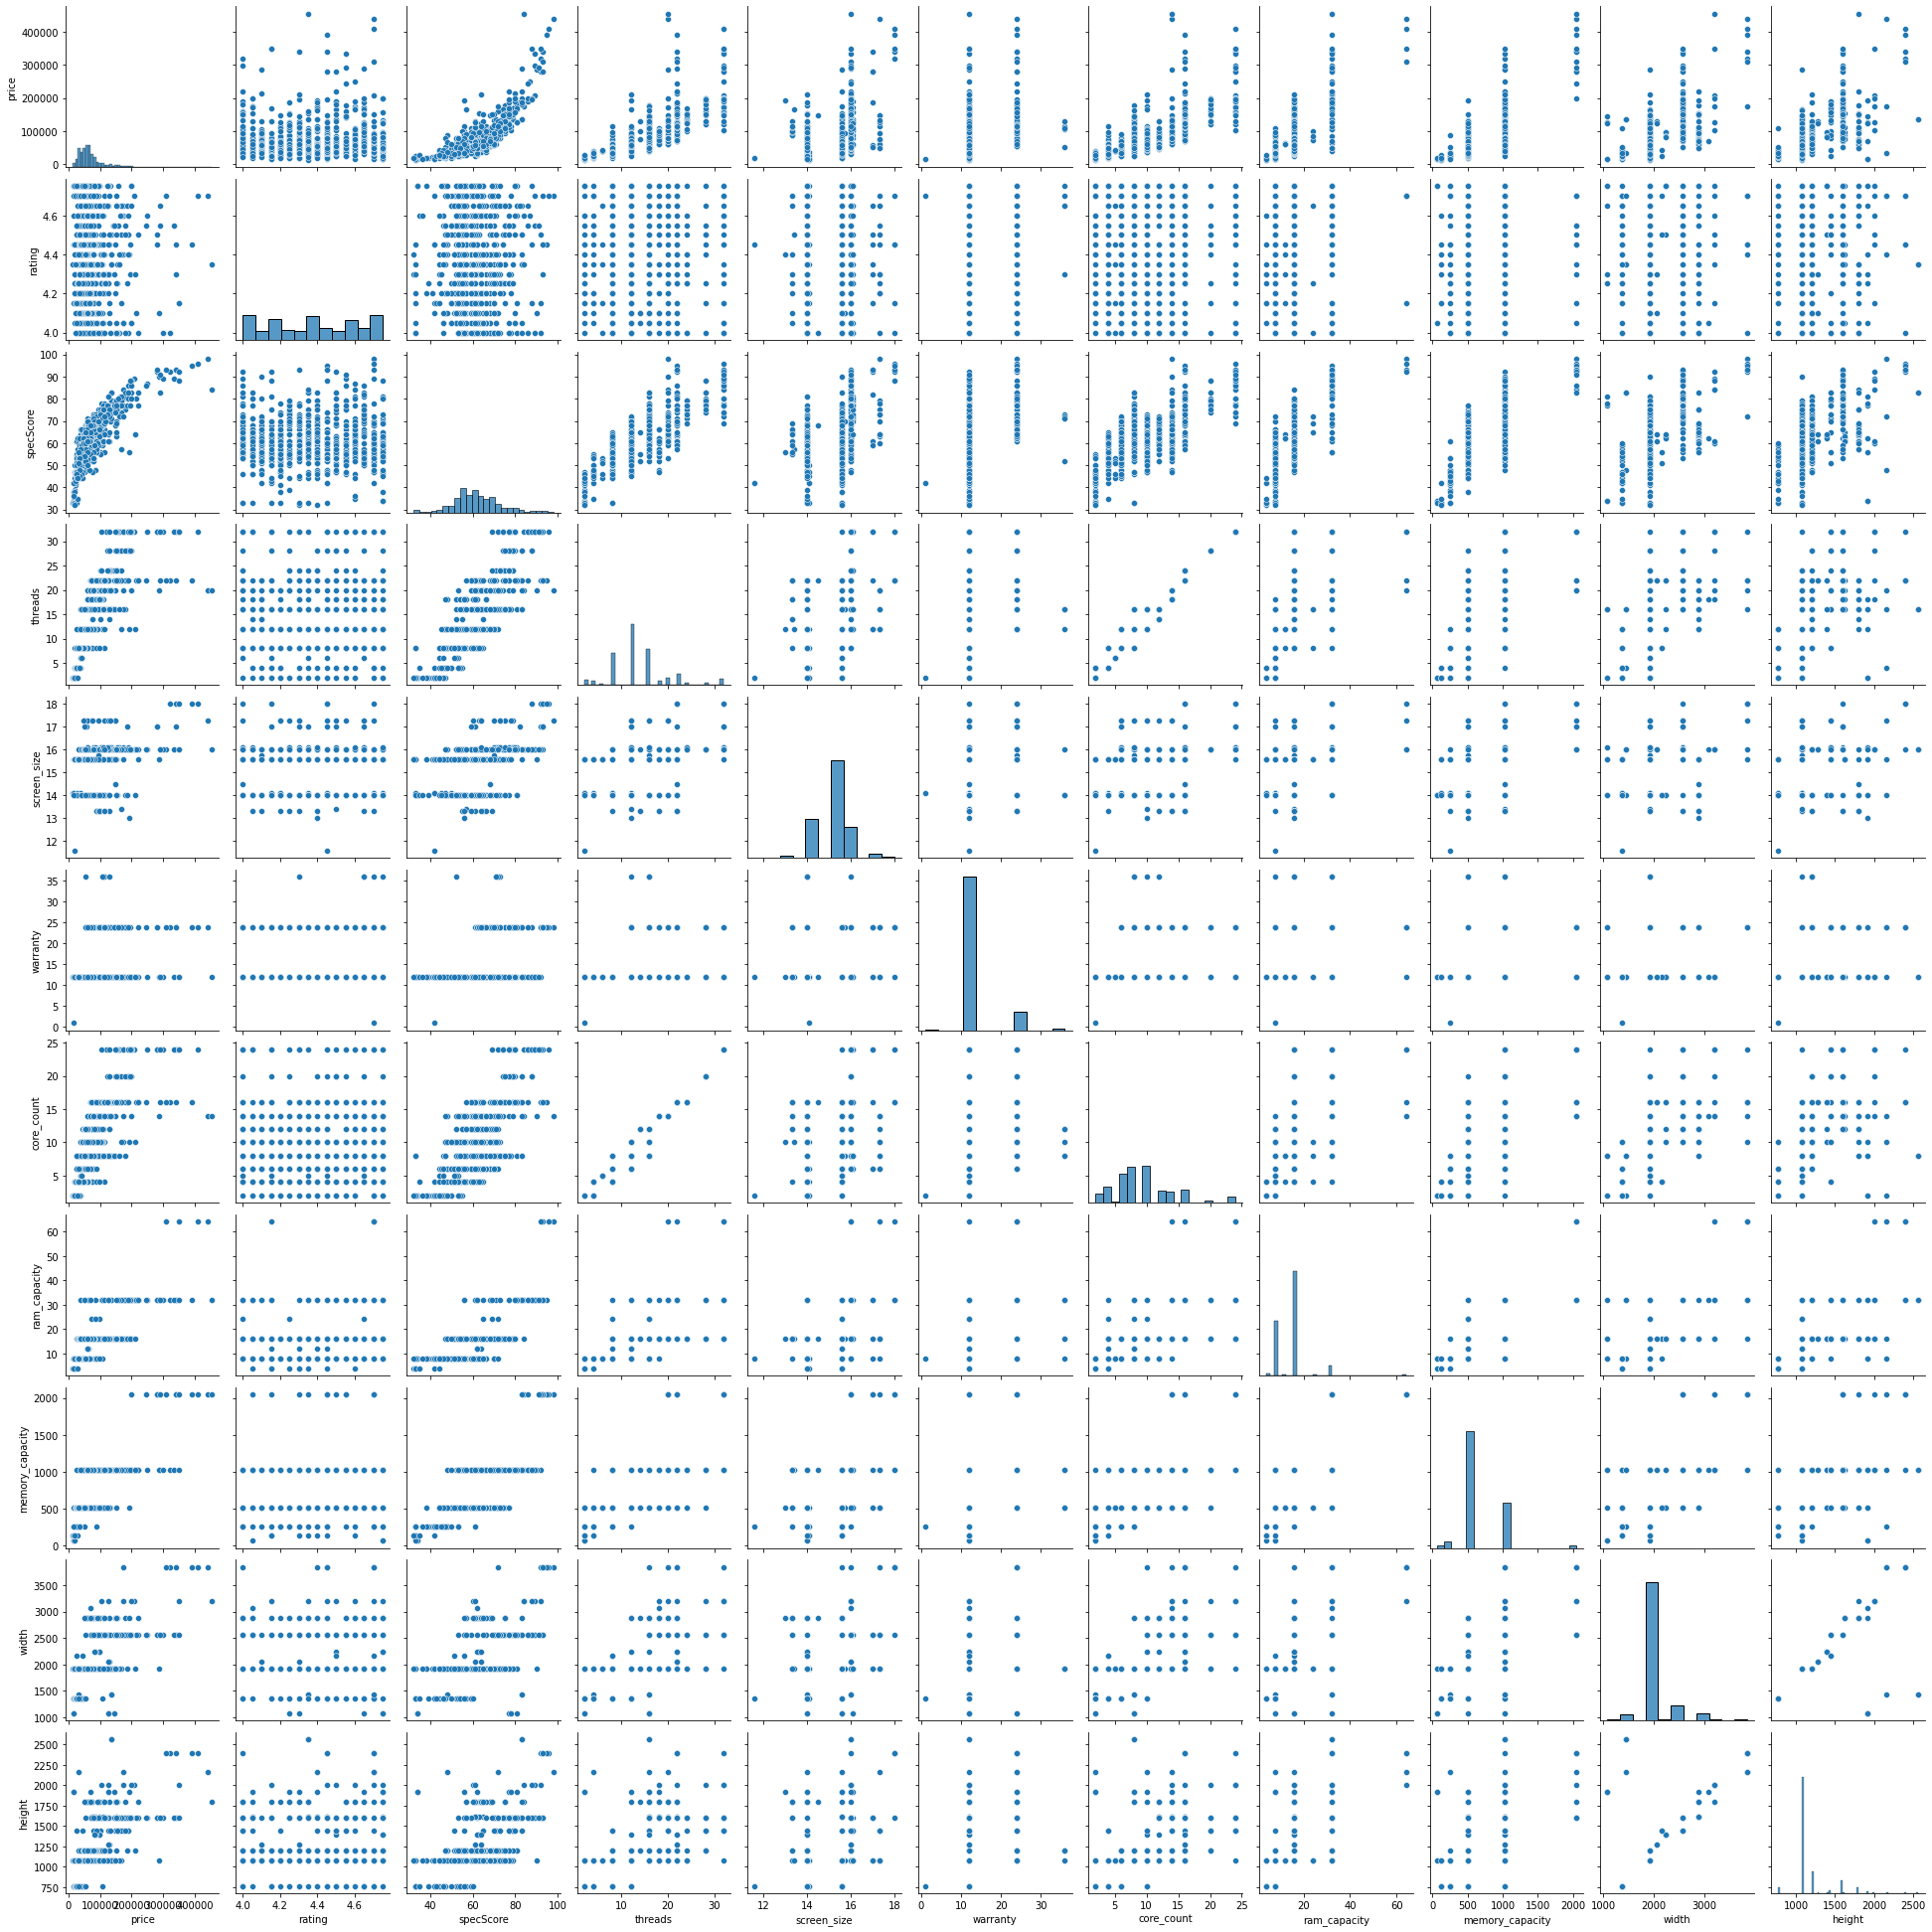

In [144]:
sns.pairplot(data_df)

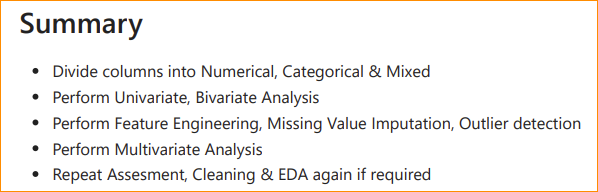

In [145]:
data_df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand
411,44990,4.75,62,Acer,8,14.0,Windows 11,12,4,Intel,16,DDR4,1024,SSD,1920,1080,Intel
382,99990,4.10,56,Asus,18,14.0,Windows 11,12,14,Intel,16,LPDDR5X,1024,SSD,1920,1200,Intel
8,74990,4.40,63,HP,12,15.6,Windows 11,12,8,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA
550,114999,4.20,56,Dell,8,14.0,Windows 10,12,4,Intel,16,DDR4,512,SSD,1920,1080,Intel
307,61990,4.40,68,Asus,16,15.6,Windows 11,12,8,AMD,16,DDR5,512,SSD,1920,1080,NVIDIA


In [146]:
data_df['width'].value_counts()

1920    658
2560     72
2880     35
1366     27
3840      7
3200      7
1080      5
2240      4
1440      3
2160      2
2048      2
3072      1
2561      1
Name: width, dtype: int64

## Feature Engineering : Creating a new column PPI

In [148]:
# Calculate diagonal resolution
data_df['diagonal_resolution'] = np.sqrt(data_df['width']**2 + data_df['height']**2)

# Calculate PPI
data_df['PPI'] = data_df['diagonal_resolution'] / data_df['screen_size']

In [149]:
data_df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand,diagonal_resolution,PPI
78,64990,4.20,64,Lenovo,12,15.6,Windows 11,12,6,AMD,16,DDR5,512,SSD,1920,1080,NVIDIA,2202.907170,141.211998
194,71990,4.50,71,MSI,12,15.6,Windows 11,24,6,AMD,16,DDR4,512,SSD,1920,1080,NVIDIA,2202.907170,141.211998
256,82990,4.65,69,Asus,16,16.0,Windows 11,12,10,Intel,16,DDR4,1024,SSD,1920,1200,NVIDIA,2264.155472,141.509717
134,65990,4.05,63,Asus,16,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,1920,1080,Intel,2202.907170,141.211998
225,66490,4.60,65,Lenovo,12,15.6,Windows 11,12,8,Intel,16,DDR5,512,SSD,1920,1080,NVIDIA,2202.907170,141.211998


#### Need to perform eda b/w price & ppi 

- these 2 have some relationship

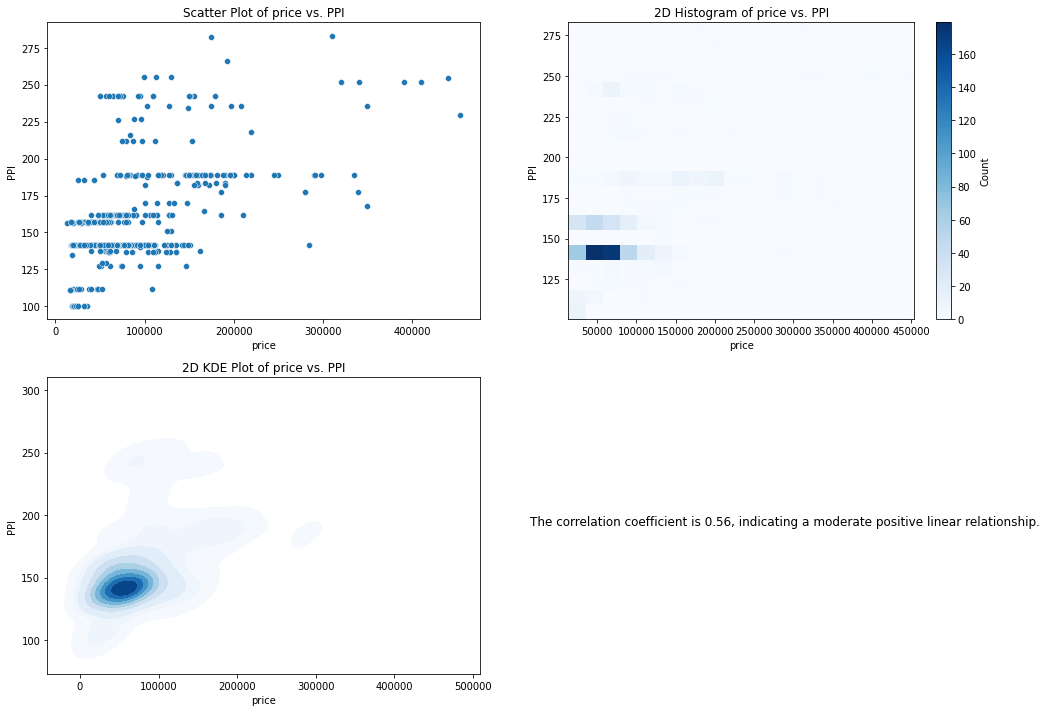

0.5581844603763326

In [151]:
bi_variate_for_2_cols(data_df,'price','PPI')

In [152]:
data_df.sample(5)

,price,rating,specScore,brand,threads,screen_size,os,warranty,core_count,processor_brand,ram_capacity,ram_type,memory_capacity,memory_type,width,height,graphics_card_brand,diagonal_resolution,PPI
354,75990,4.10,52,HP,14,16.0,Windows 11,12,12,Intel,16,LPDDR5,512,SSD,1920,1200,Intel,2264.155472,141.509717
306,93990,4.45,65,HP,16,15.6,Windows 11,12,10,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA,2202.907170,141.211998
663,79990,4.40,66,MSI,12,15.6,Windows 11,24,8,Intel,16,DDR4,1024,SSD,1920,1080,NVIDIA,2202.907170,141.211998
10,53990,4.55,66,Acer,12,15.6,Windows 11,12,8,Intel,16,DDR4,512,SSD,1920,1080,NVIDIA,2202.907170,141.211998
196,56990,4.70,63,HP,16,15.6,Windows 11,12,8,AMD,16,DDR4,1024,SSD,1920,1080,AMD,2202.907170,141.211998


In [153]:
data_df.drop(columns=['width','height','diagonal_resolution'], inplace=True)

In [154]:
data_df.to_excel('smartprix_laptop_cleaned_v7.xlsx', index=False)